In [1]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import sys
import scipy
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp
from Sc_module import convert_to_float_timestamps
from Sc_module import ucla_time2useful_time
# from Sc_module import ucla_time2useful_time
plt.rc('font', size=12) 
myFmt = mdates.DateFormatter('%H:%M')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/07_PWORK_comps/"

#######################################
# Styles: Preethi

print(plt.style.available)  #'seaborn-bright'  'ggplot'  'bmh'  'classic'  ''
# plt.style.use('dark_background')
# plt.style.use('ggplot')
# plt.style.use('seaborn-dark')
plt.style.use('seaborn-poster')

#######################################
# Read in data of all five:

ds_theta_v4 = xr.open_dataset("/home/qwertz/obs_data_MA/iqq_foghat/theta_v_spec_hum_iqq_22_23apschera20240304.nc")
old_controle = "/home/qwertz/UCLA/uclales/Runs/CONTROLE_RUN (another copy)/"
sst_minus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_MINUS/"
sst_plus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_PLUS/"
ccn_plus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_PLUS/"
ccn_minus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_MINUS/"
grid5_00 = "/home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/"
grid_icon_00 ="/home/qwertz/UCLA/uclales/Runs/00_GRID_ICONLES/"
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
file2 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_clwvi_p00_20180822000000.nc"
cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]

print(grid5_00+"rf01.ts.nc")

ds_class22 = xr.open_dataset(cloudnet_path+files[0])
ds_foghat_cloud22 = xr.open_dataset(file2)#, engine="netcdf4")
controle_tsds = xr.open_dataset(old_controle+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sstplus_tsds =xr.open_dataset(sst_plus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sst_minus_tsds = xr.open_dataset(sst_minus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
controle_psds = xr.open_dataset(old_controle+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sstplus_psds =xr.open_dataset(sst_plus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sst_minus_psds = xr.open_dataset(sst_minus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ds_icon = xr.open_dataset(file_icon)
ds_ccn_minus = xr.open_dataset(ccn_minus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ds_ccn_plus = xr.open_dataset(ccn_plus00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid5_00_tsds = xr.open_dataset(grid5_00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid5_00_psds = xr.open_dataset(grid5_00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid_icon_00_tsds = xr.open_dataset(grid_icon_00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid_icon_00_psds = xr.open_dataset(grid_icon_00+"rf01.ps.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))


ccn_minus_tsds= xr.open_dataset(ccn_minus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ccn_plus_tsds= xr.open_dataset(ccn_plus00+"rf01.ts.nc").sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
#######################################


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/rf01.ts.nc


kg m-2
kg m-2
g/m^2


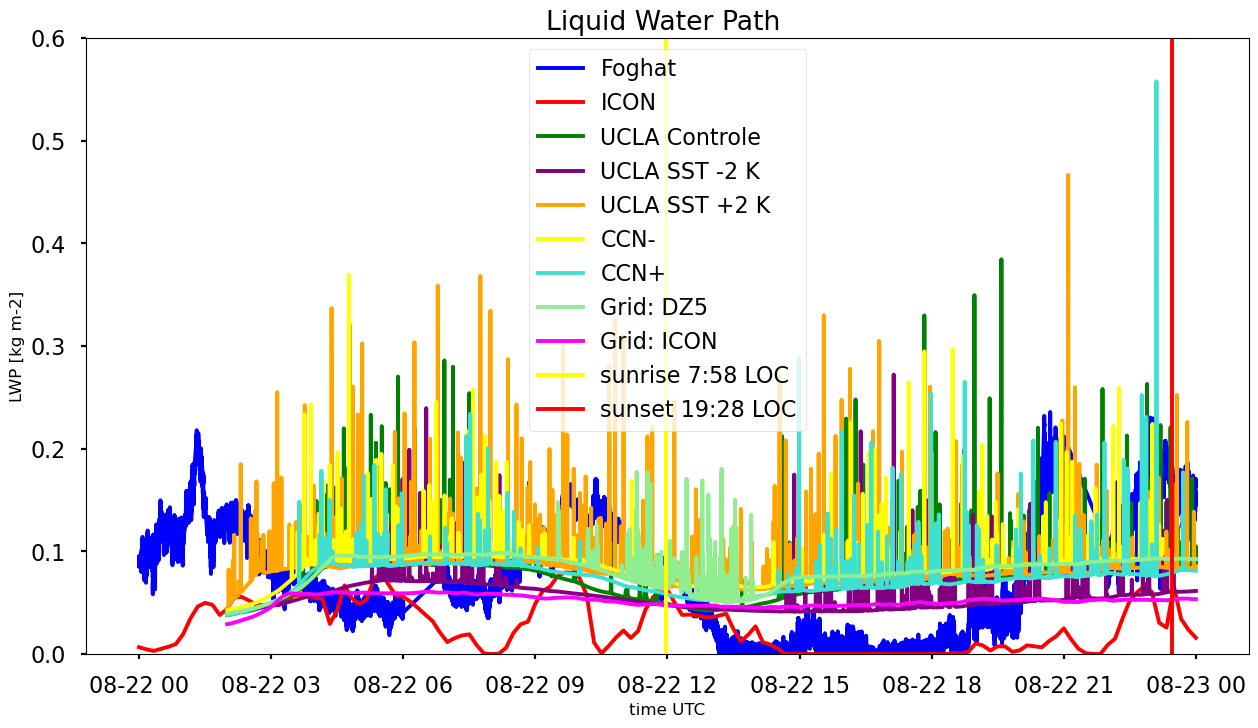

In [16]:
# Plot LWP of all five for 22nd of August:

from scipy import signal

######################################

def ucla_time2useful_time(ucla_time):
    # <class 'numpy.datetime64'> angeblich hat es bereits diesen Datentypen...
    time_list = []
    for i, timestep in enumerate(ucla_time):
        if i>2 and str(timestep)[10:19]=="T00:00:00":
            string = "2018-08-23"+str(timestep)[10:]
        else:
            string = "2018-08-22"+str(timestep)[10:]
        time_list.append(np.datetime64(string))
    new_time = np.array(time_list)
    return new_time

########################################

lwp_icon = ds_icon["tqc"].isel(ncells=0).sel(time=slice(20180822.0, 20180823.0))
ds_foghat_cloud22["clwvi"]
icon_times_np = [convert_single_timestamp(value) for value in lwp_icon["time"].values]
controle_time = ucla_time2useful_time(controle_tsds["time"].values)
ccn_new_time = ucla_time2useful_time( ccn_minus_tsds["time"].values)

print(lwp_icon.units)
print(ds_foghat_cloud22["clwvi"].units)
print(controle_tsds["lwp_bar"].units)

#########################################
# Resampling:

# ds_foghat_cloud22["time"].values
# ds_foghat_cloud22["clwvi"].values
new_foghat_data = signal.resample(ds_foghat_cloud22["clwvi"].values, 100, t=ds_foghat_cloud22["time"].values)
new_foghat_time = signal.resample(ds_foghat_cloud22["time"].values, 100, t=ds_foghat_cloud22["time"].values)
new_foghat_data =ds_foghat_cloud22["clwvi"].values
new_foghat_time = ds_foghat_cloud22["time"].values

##########################################

plt.figure(figsize=(15,8))
plt.title("Liquid Water Path ")
plt.plot(new_foghat_time, new_foghat_data, label="Foghat", color="blue")
plt.plot(icon_times_np, lwp_icon.values, label="ICON", color="red")
plt.plot(controle_time, controle_tsds["lwp_bar"].values/1000, label="UCLA Controle", color="green")
plt.plot(controle_time, sst_minus_tsds["lwp_bar"].values/1000, label="UCLA SST -2 K", color="purple")
plt.plot(controle_time, sstplus_tsds["lwp_bar"].values/1000, label="UCLA SST +2 K", color="orange")
plt.plot(ccn_new_time, ccn_minus_tsds["lwp_bar"].values/1000, label="CCN-", color="yellow")
plt.plot(controle_time, ccn_plus_tsds["lwp_bar"].values/1000, label="CCN+", color="turquoise")
plt.plot(controle_time, grid5_00_tsds["lwp_bar"].values/1000, label="Grid: DZ5", color="lightgreen")
plt.plot(controle_time, grid_icon_00_tsds["lwp_bar"].values/1000, label="Grid: ICON", color= "magenta")
plt.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
plt.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
plt.xlabel("time UTC", fontsize=12)
plt.ylabel("LWP [kg m-2]", fontsize=12)
plt.ylim(0, 0.6)
plt.legend()
# plt.savefig(outputdir+lwp_timeseries.png)




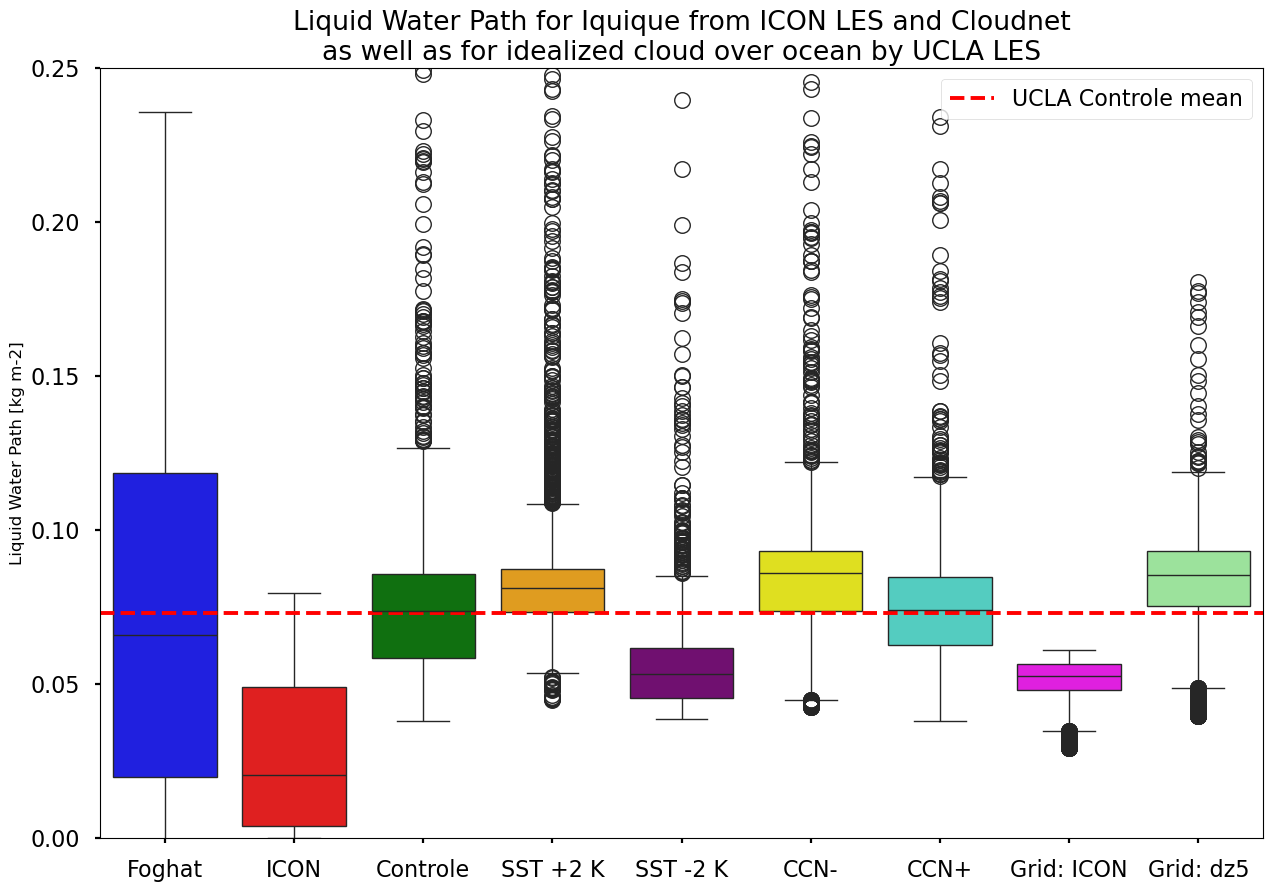

In [3]:
# Lieber als boxplot oder mit reduziertem Rauschen?

import seaborn as sns

########################################

def remove_nans(arr):
    arr = np.array(arr)
    cleaned_arr = arr[~np.isnan(arr)]
    return cleaned_arr

########################################
#ds_ccn_minus
#ds_ccn_plus 

lwp_data = {"Foghat":remove_nans(ds_foghat_cloud22["clwvi"].values), "ICON":remove_nans(lwp_icon.values),\
             "Controle":remove_nans(controle_tsds["lwp_bar"].values/1000),\
             "SST +2 K":remove_nans(sstplus_tsds["lwp_bar"].values/1000),\
                                         "SST -2 K":remove_nans(sst_minus_tsds["lwp_bar"].values/1000),\
           "CCN-":remove_nans(ccn_minus_tsds["lwp_bar"].values/1000),\
           "CCN+":remove_nans(ccn_plus_tsds["lwp_bar"].values/1000),\
           "Grid: ICON":remove_nans(grid_icon_00_tsds["lwp_bar"].values/1000),\
           "Grid: dz5":remove_nans(grid5_00_tsds["lwp_bar"].values/1000),}

plt.figure(figsize=(15,10))
plt.title("Liquid Water Path for Iquique from ICON LES and Cloudnet\nas well as for idealized cloud over ocean by UCLA LES") 
sns.boxplot(data=lwp_data, palette=["blue", "red", "green", "orange", "purple","yellow",\
                                      "turquoise", "magenta", "lightgreen"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Controle mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=12) 
plt.ylim(0,0.25)
plt.legend()
# plt.tight_layout()
plt.savefig(outputdir+"boxplot_LWP_7ucla_1ICON_1obs.png")
# plt.close()

###################################################
# Schreibe UCLA tiefergestellt in den Index.
# Kürze Conrtole up
# Schreibe SST+2K zusammen ohne Leerzeichen

[925. 925. 925. ... 905. 905. 905.]


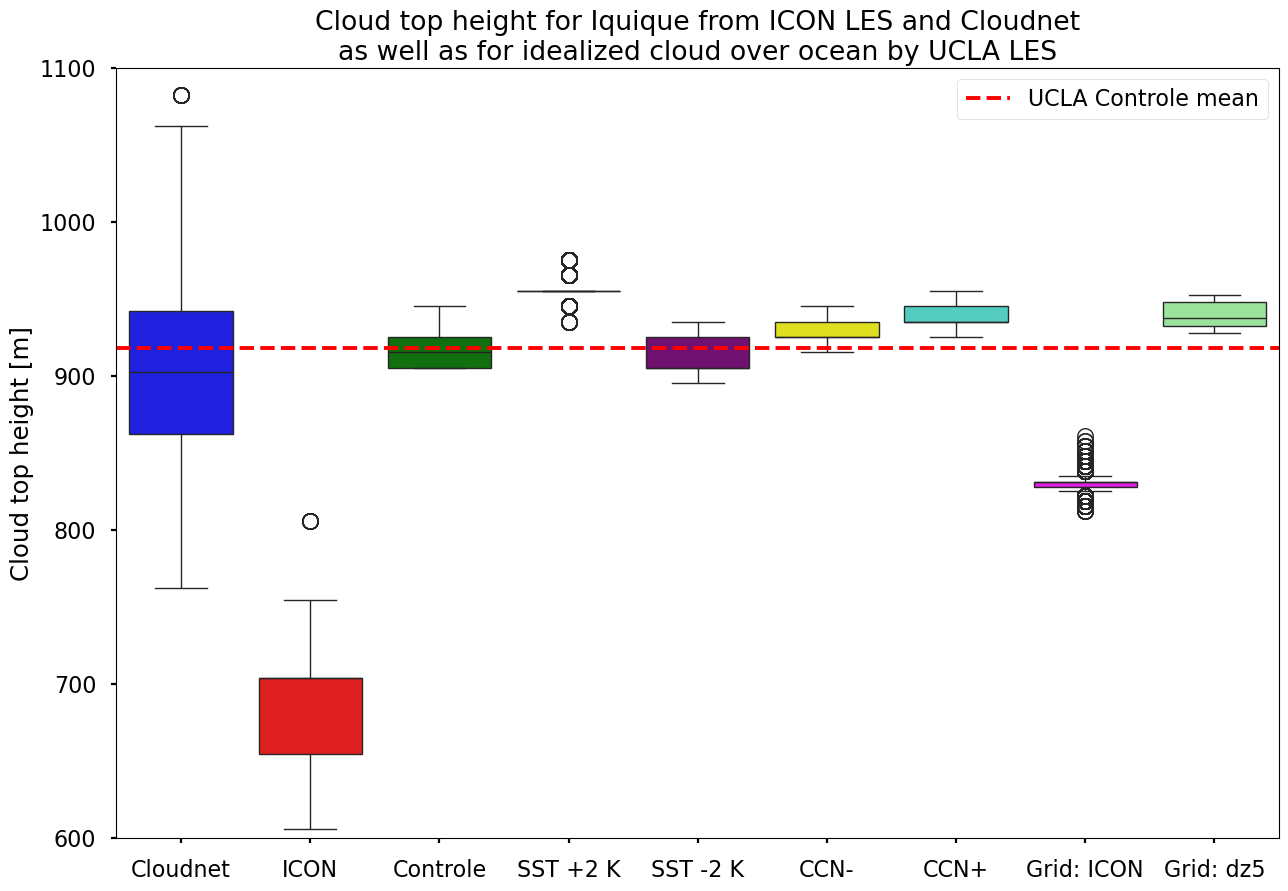

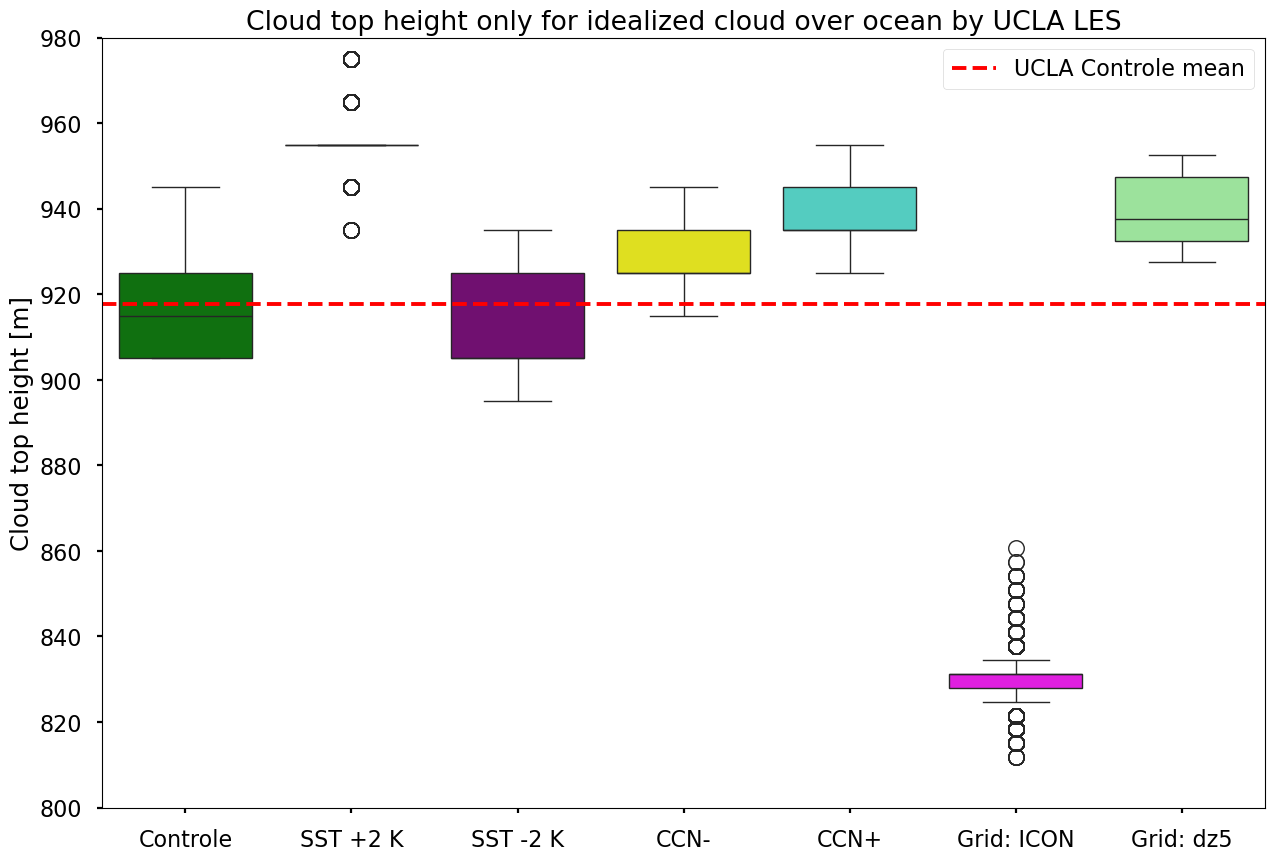

In [4]:
# Boxplot der Clout top height (PBL height?)



########################################
# pick timeframe of data:

begin_float=20180822.0
end_float=20180823.0
datetime_begin = str(convert_single_timestamp(begin_float))[:19]
datetime_end = str(convert_single_timestamp(end_float))[:19]
    
ds_cb = ds_icon.isel(ncells=0).sel(time=slice(begin_float,end_float))

#####################
# ALgorithm to derive cloudbases and cloudtops:

heights = ds_icon["z_mc"].isel(ncells=0).values
times = [convert_single_timestamp(date) for date in ds_cb["time"].values]

cloudbases_icon = []
cloudtops_icon = []
for i, timestep in enumerate(times):
    base_found = False
    top_found = False

    #print("\n\n",i, timestep, "\n")
    
    for j, height in enumerate(heights): 
        qc_value = ds_cb["qc"].values[i,j]
        if j > len(heights)-2:
            if not base_found:
                cloudbases_icon.append(np.nan)
                #print("base added1!!")
            if not top_found:
                cloudtops_icon.append(np.nan)
                #print("top added1!!!")
            break
            
        if qc_value>0 and ds_cb["qc"].values[i,j+1]>0 and ds_cb["qc"].values[i,j-1]==0 and ds_cb["qc"].values[i,j-2]==0 and not top_found:
            #print("first case (top): ",height)
            top_found = True
            cloudtops_icon.append(height)
            #print("base added2!!")
            
        elif qc_value==0 and ds_cb["qc"].values[i,j+1]==0 and ds_cb["qc"].values[i,j-1]>0 and ds_cb["qc"].values[i,j-2]>0 and not base_found:
            #print("second case (base): ",height)
            base_found = True
            cloudbases_icon.append(height)
            #print("top added2!!!")

##############################################################
# Wolkendicke berechnen!
h_icon = []
for i in range(len(cloudtops_icon)):
    h_icon.append(cloudtops_icon[i]- cloudbases_icon[i])

########################################
# Get cloud top heights or other data for PBL height:

cth_cloudnet = ds_class22["cloud_top_height"].isel(layer=0) # xr.DataArray
cth_icon = cloudtops_icon # List of values
cth_controle = controle_tsds["zc"] #xr.DataArray
cth_plus = sstplus_tsds["zc"] #xr.DataArray
cth_minus = sst_minus_tsds["zc"] #xr.DataArray
cth_ccn_plus = ccn_plus_tsds["zc"] #xr.DataArray
cth_ccn_minus = ccn_minus_tsds["zc"] #xr.DataArray
cth_grid_dz5 = grid5_00_tsds["zc"] #xr.DataArray
cth_grid_icon = grid_icon_00_tsds["zc"] #xr.DataArray

cloudtops = {"Cloudnet":cth_cloudnet.values, "ICON":cth_icon, "Controle":cth_controle.values,\
             "SST +2 K":cth_plus.values, "SST -2 K":cth_minus.values, "CCN-": cth_ccn_minus.values,\
             "CCN+": cth_ccn_plus.values, "Grid: ICON": cth_grid_icon.values, "Grid: dz5": cth_grid_dz5.values}


print(cth_minus.values)

########################################
#tips = sns.load_dataset("tips")
#print(type(tips))
# plot a box plot
# sns.boxplot(x="smoker", y="total_bill", hue="day",data=tips)

plt.figure(figsize=(15,10))
sns.boxplot(data=cloudtops, palette=["blue", "red", "green", "orange", "purple","yellow",\
                                      "turquoise", "magenta", "lightgreen"])# , whis=(0,100)) #, ax = d[2])
plt.title('Cloud top height for Iquique from ICON LES and Cloudnet\nas well as for idealized cloud over ocean by UCLA LES')
plt.ylim(600, 1100)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Controle mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]') # give a label name to the x axis
plt.legend()
# plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_7ucla_1ICON_1obs.png")

####
# 2nd Plot: only UCLA

cloudtops_red = {"Controle":cth_controle.values,\
             "SST +2 K":cth_plus.values, "SST -2 K":cth_minus.values, "CCN-": cth_ccn_minus.values,\
             "CCN+": cth_ccn_plus.values, "Grid: ICON": cth_grid_icon.values, "Grid: dz5": cth_grid_dz5.values}
plt.figure(figsize=(15,10))
sns.boxplot(data=cloudtops_red, palette=["green", "orange", "purple","yellow",\
                                      "turquoise", "magenta", "lightgreen"]) #, ax = d[2])
plt.title('Cloud top height only for idealized cloud over ocean by UCLA LES')
plt.ylim(800, 980)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Controle mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]') # give a label name to the x axis
plt.legend()
# plt.tight_layout()
plt.savefig(outputdir+"boxplot_cloudtops_only7ucla.png")

#################################
####
# Test plot

dummy_data = {"Cloudnet":cth_cloudnet.values, "ICON":cth_icon, "UCLA Controle":cth_controle.values,\
             "UCLA SST +2 K":cth_plus.values, "UCLA SST -2 K":cth_minus.values, "CCN +":cth_cloudnet.values,\
              "CCN-":cth_cloudnet.values, "grid ICON":cth_cloudnet.values, "grid 5m":cth_cloudnet.values}
plt.figure(figsize=(15,10))
sns.boxplot(data=dummy_data, palette=["blue","red", "green", "orange", "purple", "yellow",\
                                      "turquoise", "magenta", "lightgreen"]) #, ax = d[2])
plt.title('Test plot')
plt.ylim(550, 1100)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Controle mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]') # give a label name to the x axis
plt.legend()
# plt.tight_layout()
#plt.savefig(outputdir+"dummy.png")
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


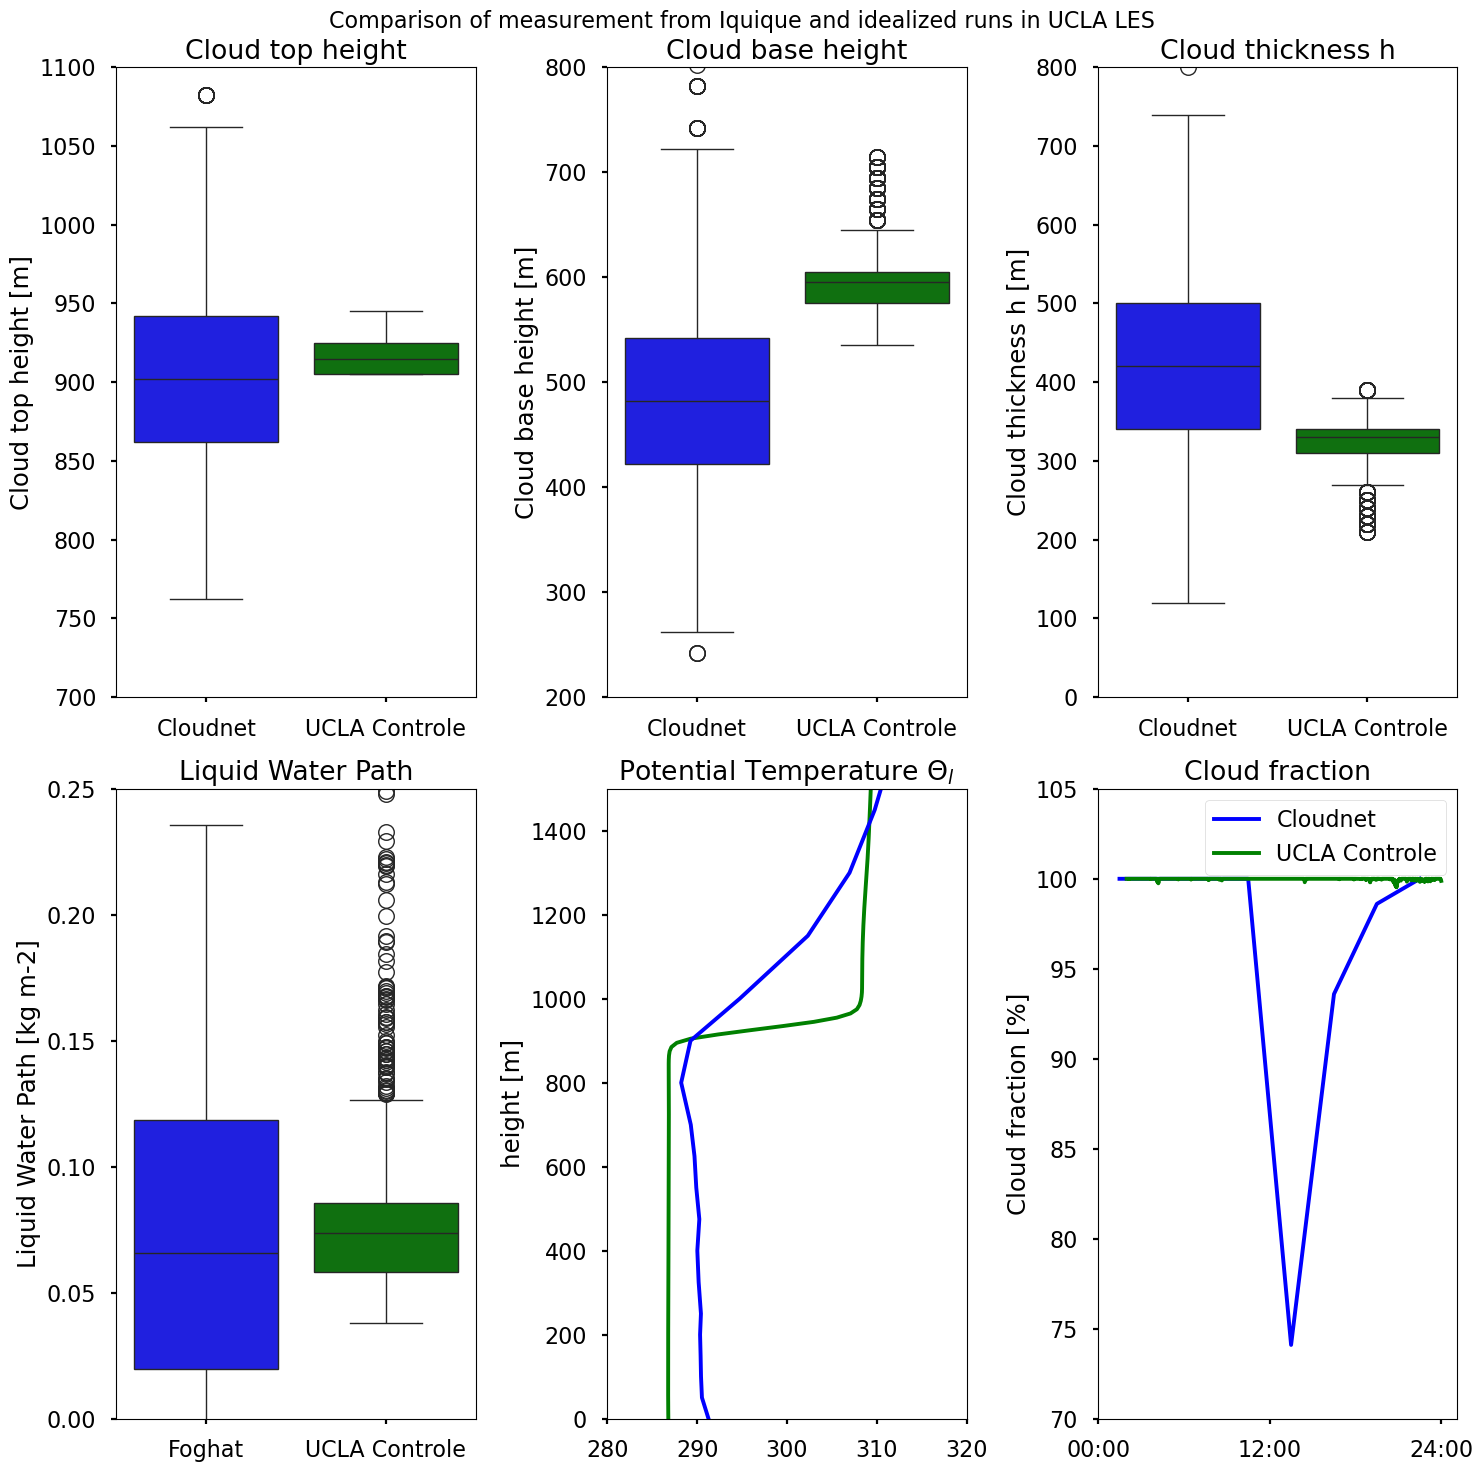

In [5]:
# Multipanel plot for relevance of Controle run!

##############################################
# Single plots to choose from:

###
# 1st LWP => Calculate correlation, maybe have an LWP plot like for ICON
lwp_data2 = {"Foghat":remove_nans(ds_foghat_cloud22["clwvi"].values),"UCLA Controle":remove_nans(controle_tsds["lwp_bar"].values/1000)}
# "ICON":remove_nans(lwp_icon.values)}

plt.figure(figsize=(15,10))
plt.title("Liquid Water Path from Cloudnet at Iquique and UCLA LES Controle run", fontsize=12) 
sns.boxplot(data=lwp_data2, palette=["blue", "green"]) #, ax = d[2])
plt.axhline(np.nanmean(controle_tsds["lwp_bar"].values/1000),color="red", linestyle="dashed", label="UCLA Controle mean")
plt.ylabel("Liquid Water Path [kg m-2]", fontsize=12) 
plt.ylim(0,0.25)
plt.legend()
plt.tight_layout()
plt.close()

###
# 2nd Cloudtops => Calculate correlation, maybe have an LWP plot like for ICON
cloudtops2 = {"Cloudnet":cth_cloudnet.values, "UCLA Controle":cth_controle.values}
# "ICON":cth_icon}
plt.figure(figsize=(15,10))
sns.boxplot(data=cloudtops2, palette=["blue", "green"])
plt.title('Cloud top height from Cloudnet in Iquique and UCLA LES Controle run')
plt.ylim(700, 1100)
plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Controle mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud top height [m]', fontsize=12) 
plt.legend()
plt.tight_layout()
plt.close()

###
# 3rd Focs? => Calculate correlation, maybe have an LWP plot like for ICON

###
# 4th temperature profile; Richardson profile? XXX

###
# pbl height??? other measure?

###
# cloudbase:
cloudbases2 = {"Cloudnet":ds_class22["cloud_base_height"].isel(layer=0).values, "UCLA Controle":controle_tsds["zb"].values}
plt.figure(figsize=(15,10))
sns.boxplot(data=cloudbases2, palette=["blue", "green"])
plt.title('Cloud base height from Cloudnet in Iquique and UCLA LES Controle run')
plt.ylim(200, 800)
# plt.axhline(np.nanmean(cth_controle.values),color="red", linestyle="dashed", label="UCLA Controle mean")
# plt.xlabel('Dataset') # give a label name to the x axis
plt.ylabel('Cloud base height [m]', fontsize=12) 
plt.legend()
# plt.tight_layout()
plt.close()

###
# Cloud thickness h:
cloudnet_h = ds_class22["cloud_top_height"].isel(layer=0) - ds_class22["cloud_base_height"].isel(layer=0)
cloud_thickness2 = {"Cloudnet":cloudnet_h.values, "UCLA Controle":(controle_tsds["zc"].values-controle_tsds["zb"].values)}
plt.figure(figsize=(15,10))
sns.boxplot(data=cloud_thickness2, palette=["blue", "green"])
plt.title('Cloud thickness h from Cloudnet in Iquique and UCLA LES Controle run')
plt.ylim(0, 800)
plt.ylabel('Cloud thickness h [m]', fontsize=12) 
plt.legend()
plt.close()

#############################################
# Four panel:
fig, axs = plt.subplots(2,3, figsize=(15, 15))
plt.suptitle("Comparison of measurement from Iquique and idealized runs in UCLA LES", fontsize=16)

# 1st Panel cloudtops:
sns.boxplot(data=cloudtops2, palette=["blue", "green"] , ax=axs[0,0])
axs[0,0].set_ylim(700, 1100)
axs[0,0].set_ylabel('Cloud top height [m]') 
axs[0,0].set_title('Cloud top height')

# 2nd Panel LWP:
sns.boxplot(data=lwp_data2, palette=["blue", "green"], ax=axs[1,0])
axs[1,0].set_ylim(0, 0.25)
axs[1,0].set_ylabel("Liquid Water Path [kg m-2]")
axs[1,0].set_title("Liquid Water Path")

# 3rd Panel:
sns.boxplot(data=cloudbases2, palette=["blue", "green"], ax=axs[0,1])
axs[0,1].set_ylim(200, 800)
axs[0,1].set_ylabel('Cloud base height [m]')
axs[0,1].set_title("Cloud base height")

# 4th panel:
sns.boxplot(data=cloud_thickness2, palette=["blue", "green"], ax=axs[0,2])
axs[0,2].set_ylim(0, 800)
axs[0,2].set_ylabel("Cloud thickness h [m]")
axs[0,2].set_title("Cloud thickness h")

# 5th panel:
axs[1,1].plot(controle_psds["t"].mean("time").values, controle_psds["zt"].values, color="green", label="UCLA LES Controle")
axs[1,1].plot(ds_theta_v4["theta_l"].mean("time").values, ds_theta_v4["height"].values, color="blue", label="Foghat")
axs[1,1].set_ylim(0,1500)
axs[1,1].set_xlim(280,320)
axs[1,1].set_ylabel("height [m]")
axs[1,1].set_title("Potential Temperature $\Theta_l$")

# 6th panel:
focs_cloudnet = [100.0, 100.0, 100.0, 100.0, 74.09470752, 93.59331476, 98.60724234, 100.0] 
                 #100.0, 100.0, 100.0, 100.0, 100.0, 22.22222222, 98.32402235, 100.0]
dates = [np.datetime64('2018-08-22T01:30:00'), np.datetime64('2018-08-22T04:30:00'), np.datetime64('2018-08-22T07:30:00'),\
         np.datetime64('2018-08-22T10:30:00'), np.datetime64('2018-08-22T13:30:00'), np.datetime64('2018-08-22T16:30:00'),\
         np.datetime64('2018-08-22T19:30:00'), np.datetime64('2018-08-22T22:30:00')]
         #, np.datetime64('2018-08-23T01:30:00'),\
         #np.datetime64('2018-08-23T04:30:00'), np.datetime64('2018-08-23T07:30:00'), np.datetime64('2018-08-23T10:30:00'),\
         #np.datetime64('2018-08-23T13:30:00'), np.datetime64('2018-08-23T16:30:00'), np.datetime64('2018-08-23T19:30:00'),\
         #np.datetime64('2018-08-23T22:30:00')]
axs[1,2].plot(dates, focs_cloudnet, color="blue", label="Cloudnet")
axs[1,2].plot(controle_time, controle_tsds["cfrac"].values*100, color="green", label="UCLA Controle")
axs[1,2].set_ylim(70,105)
axs[1,2].set_xticks([np.datetime64('2018-08-22T00:00:00'), np.datetime64('2018-08-22T12:00:00'), np.datetime64('2018-08-23T00:00:00')],
                   ["00:00", "12:00", "24:00"])
axs[1,2].set_title("Cloud fraction")
axs[1,2].set_ylabel("Cloud fraction [%]")
axs[1,2].legend()

plt.tight_layout()
plt.savefig(outputdir+"CONTROLE_and_Cloudnet_multipanel.png")



SST-Sensitivität:  0.006980625396184208  kg m-2 K-1
SST-Sensitivität:  10.060594584359023 m K-1


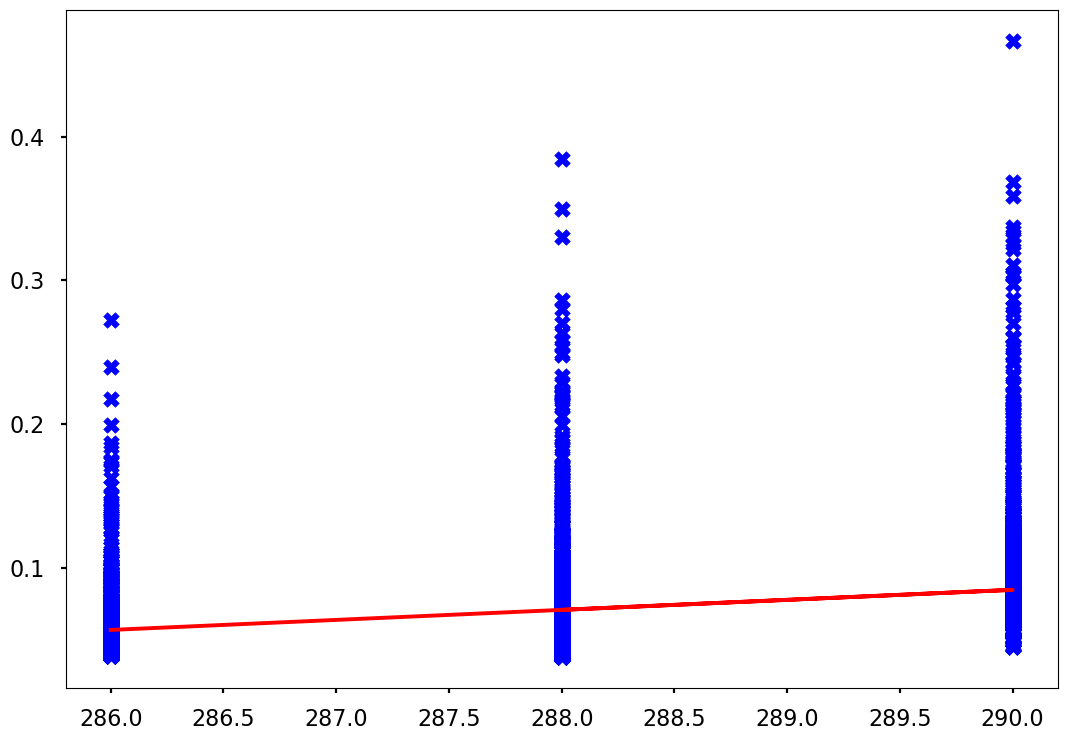

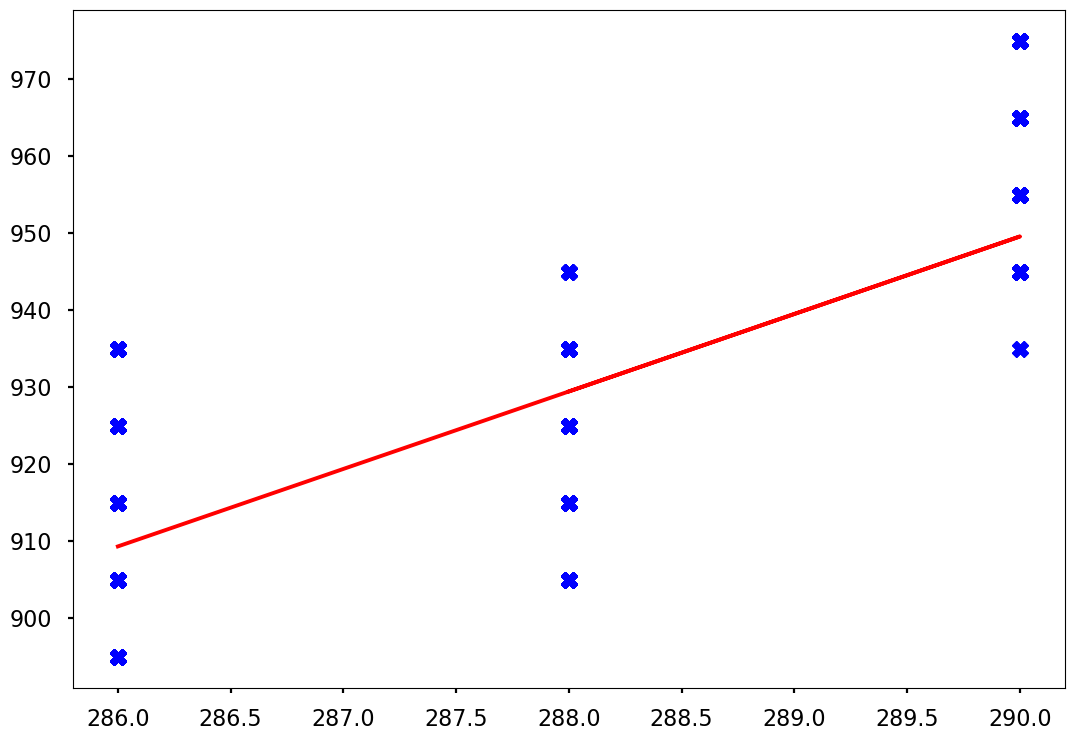

In [6]:
# Quantifiziere die Änderung in LWP und zi basierend auf SST:
# dzi/dsst; dLwp/dsst
###############################################################################

def calculate_covariance(array_1, array_2):
    if len(array_1)!=len(array_2):
        print("Arrays haven’t got same dimensions: covariance calculation failed!")
        return 1
    mean_1 = np.nanmean(array_1)
    mean_2 = np.nanmean(array_2)
    summe = 0
    numel = 0
    for i in range(len(array_1)):
        if not(np.isnan(array_1[i]) or np.isnan(array_2[i])):
            summe = summe+(array_1[i]-mean_1)*(array_2[i]-mean_2)
            numel = numel+1
    covariance = summe/(numel-1)
    if np.isnan(covariance):
        covariance=0
    return covariance
    
###############################################################################
def calculate_regression_linear(array_1, array_2):
    #See that array_1 is the x-value for this regression...
    a = calculate_covariance(array_1, array_2)/calculate_covariance(\
    array_1, array_1)
    b = np.nanmean(array_2)-a*np.nanmean(array_1)
    regression_plot = np.zeros(len(array_1))
    for i in range(len(regression_plot)):
        regression_plot[i] = a * array_1[i] + b
    return regression_plot, a

###############################################################################


lwp_data = {"Foghat":remove_nans(ds_foghat_cloud22["clwvi"].values), "ICON":remove_nans(lwp_icon.values),\
             "UCLA Controle":remove_nans(controle_tsds["lwp_bar"].values/1000),\
             "UCLA SST +2 K":remove_nans(sstplus_tsds["lwp_bar"].values/1000),\
                                         "UCLA SST -2 K":remove_nans(sst_minus_tsds["lwp_bar"].values/1000)}
cloudtops = {"Cloudnet":cth_cloudnet.values, "ICON":cth_icon, "UCLA Controle":cth_controle.values,\
             "UCLA SST +2 K":cth_plus.values, "UCLA SST -2 K":cth_minus.values}

###
# LWP(SST):
lwps = result_array = np.concatenate((lwp_data["UCLA Controle"], lwp_data["UCLA SST +2 K"], lwp_data["UCLA SST -2 K"]))
ssts = np.concatenate((np.array([288]*len(lwp_data["UCLA Controle"])), np.array([290]*len(lwp_data["UCLA SST +2 K"])),\
                       np.array([286]*len(lwp_data["UCLA SST -2 K"]))))
regression_plot, a_lwp = calculate_regression_linear(ssts, lwps)
print("SST-Sensitivität: ",a_lwp, " kg m-2 K-1")
plt.plot(ssts, regression_plot, color="red")
plt.scatter(ssts, lwps, color="blue", marker="X")

###
# CTH(SST):
cths = result_array = np.concatenate((cloudtops["UCLA Controle"], cloudtops["UCLA SST +2 K"], cloudtops["UCLA SST -2 K"]))
regression_plot, a_cth = calculate_regression_linear(ssts, cths)
print("SST-Sensitivität: ",a_cth, "m K-1")
plt.figure()
plt.plot(ssts, regression_plot, color="red")
plt.scatter(ssts, cths, color="blue", marker="X")

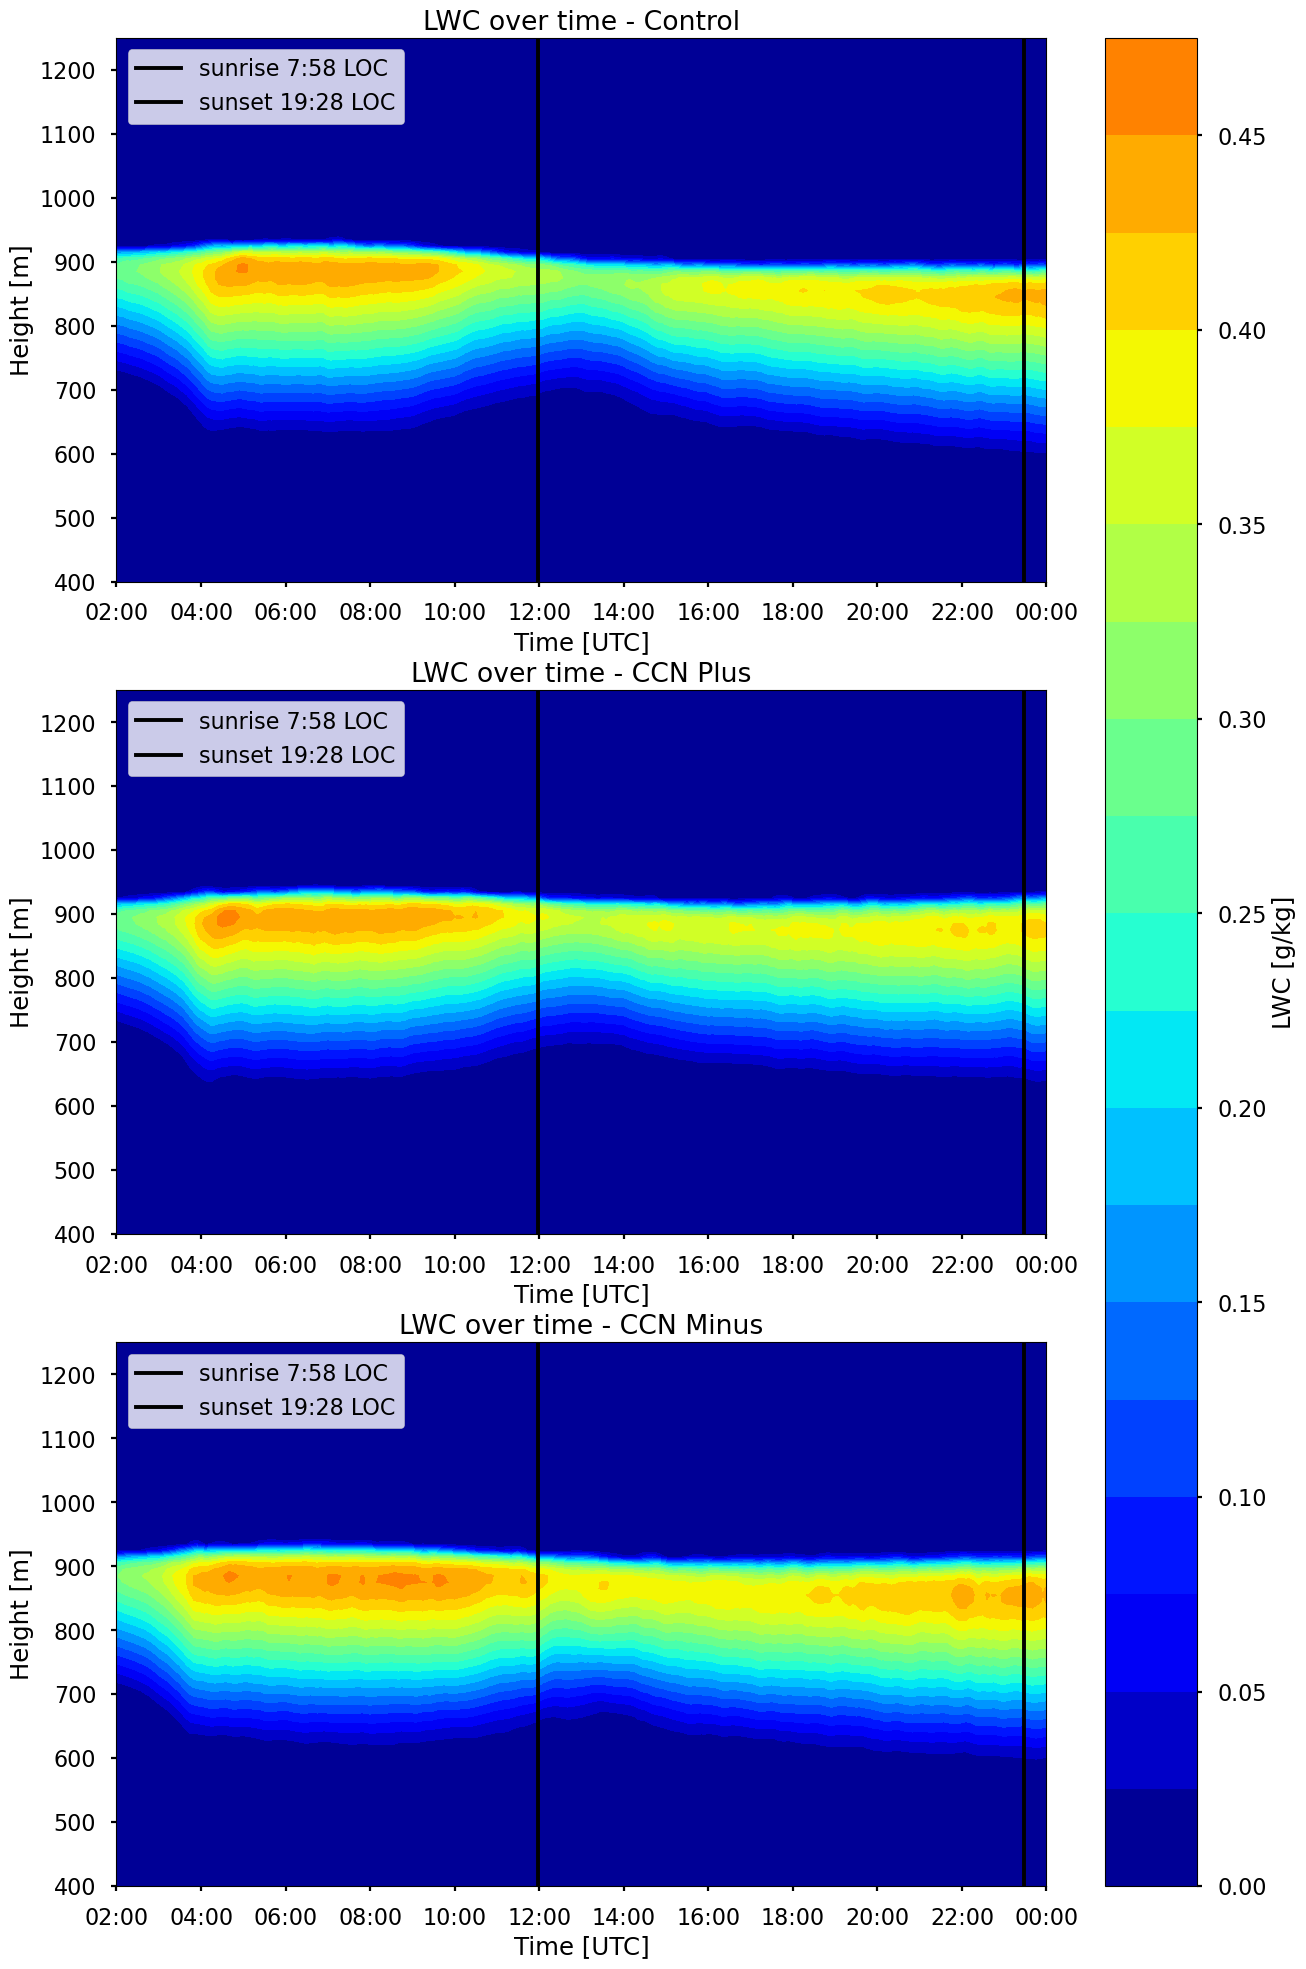

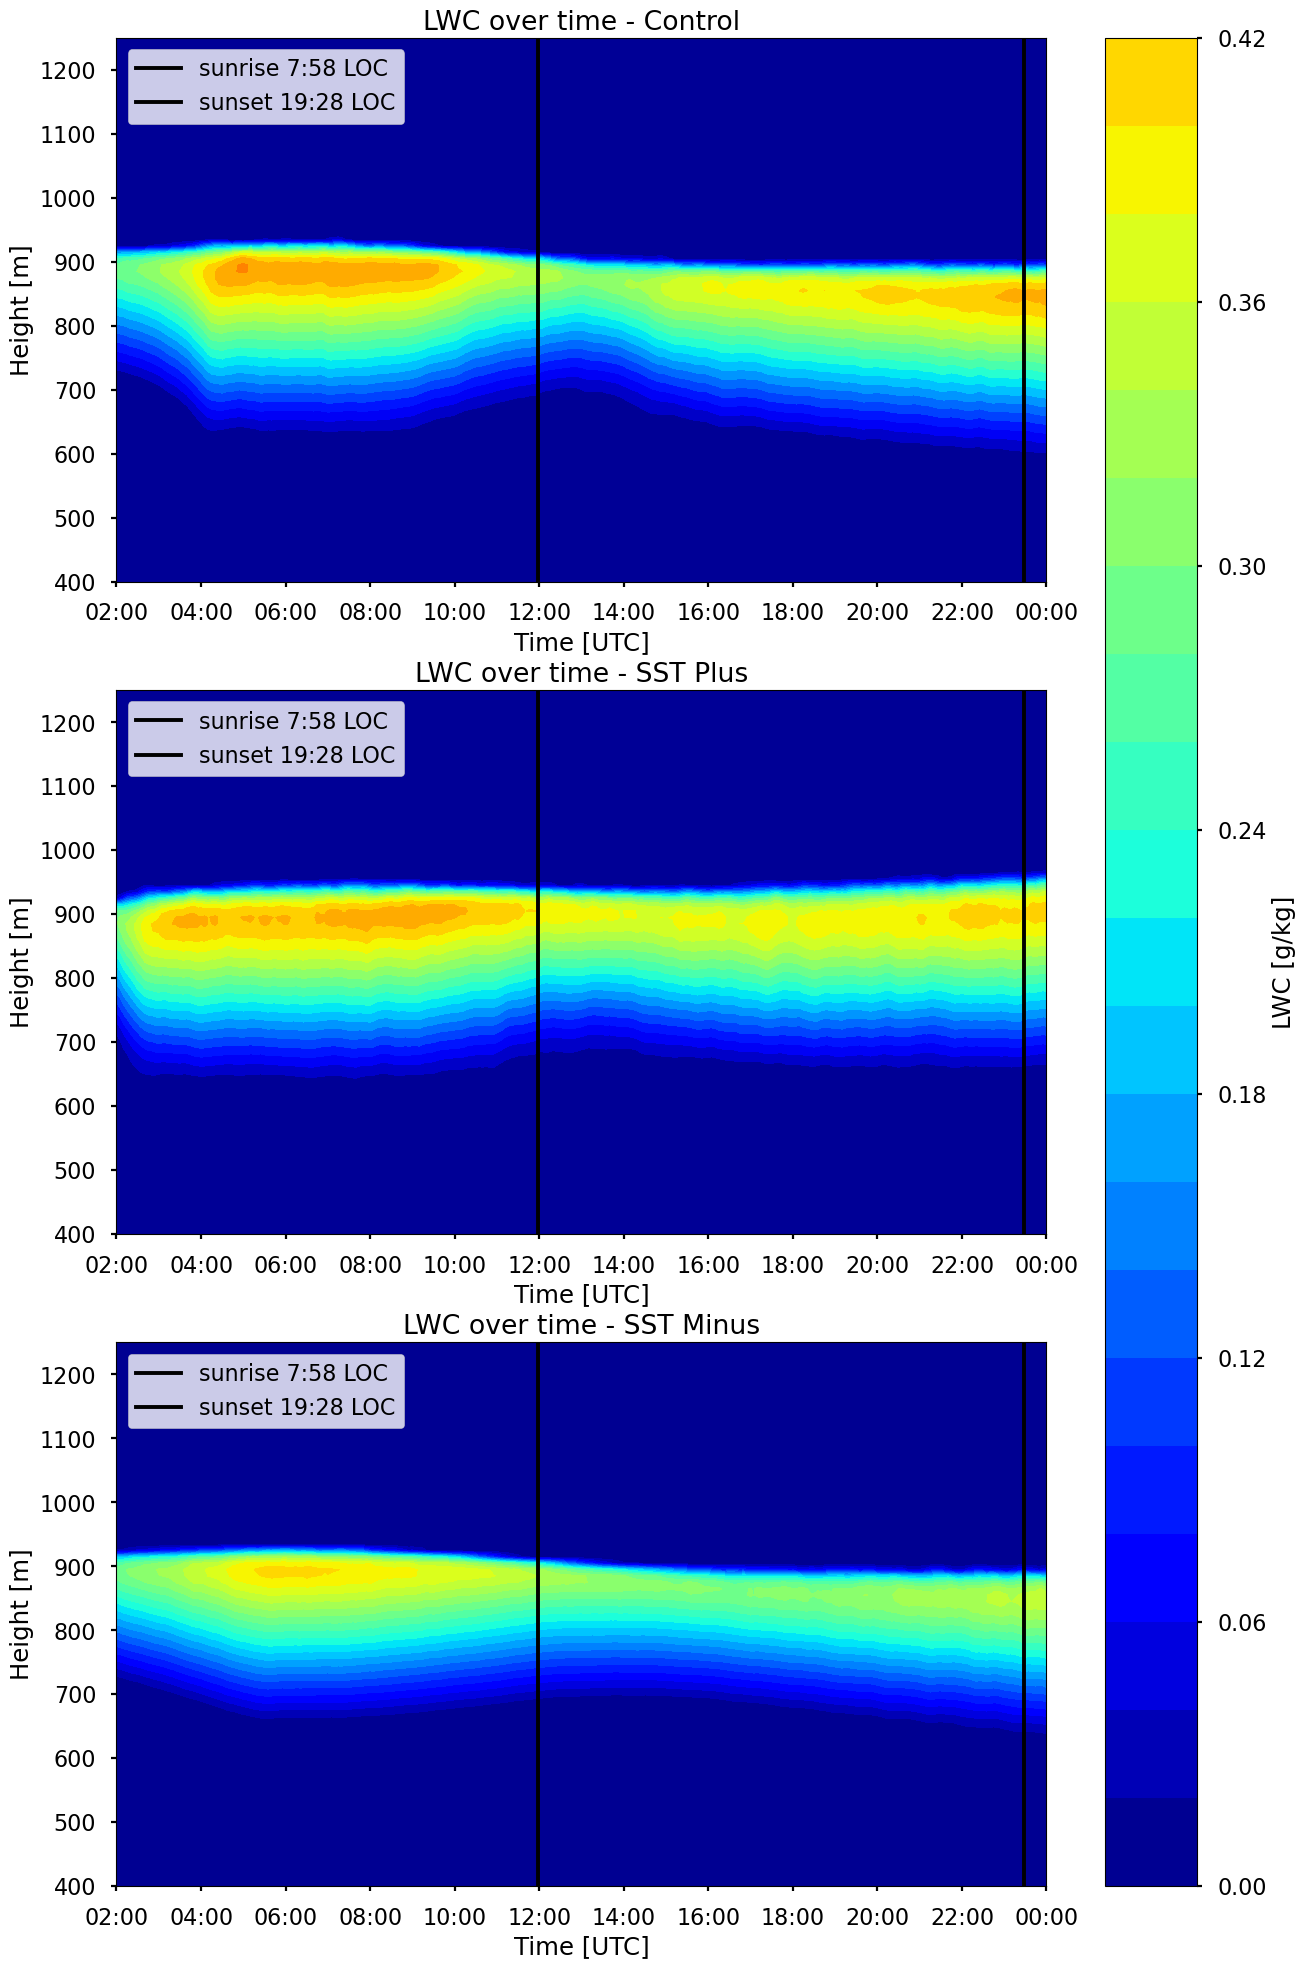

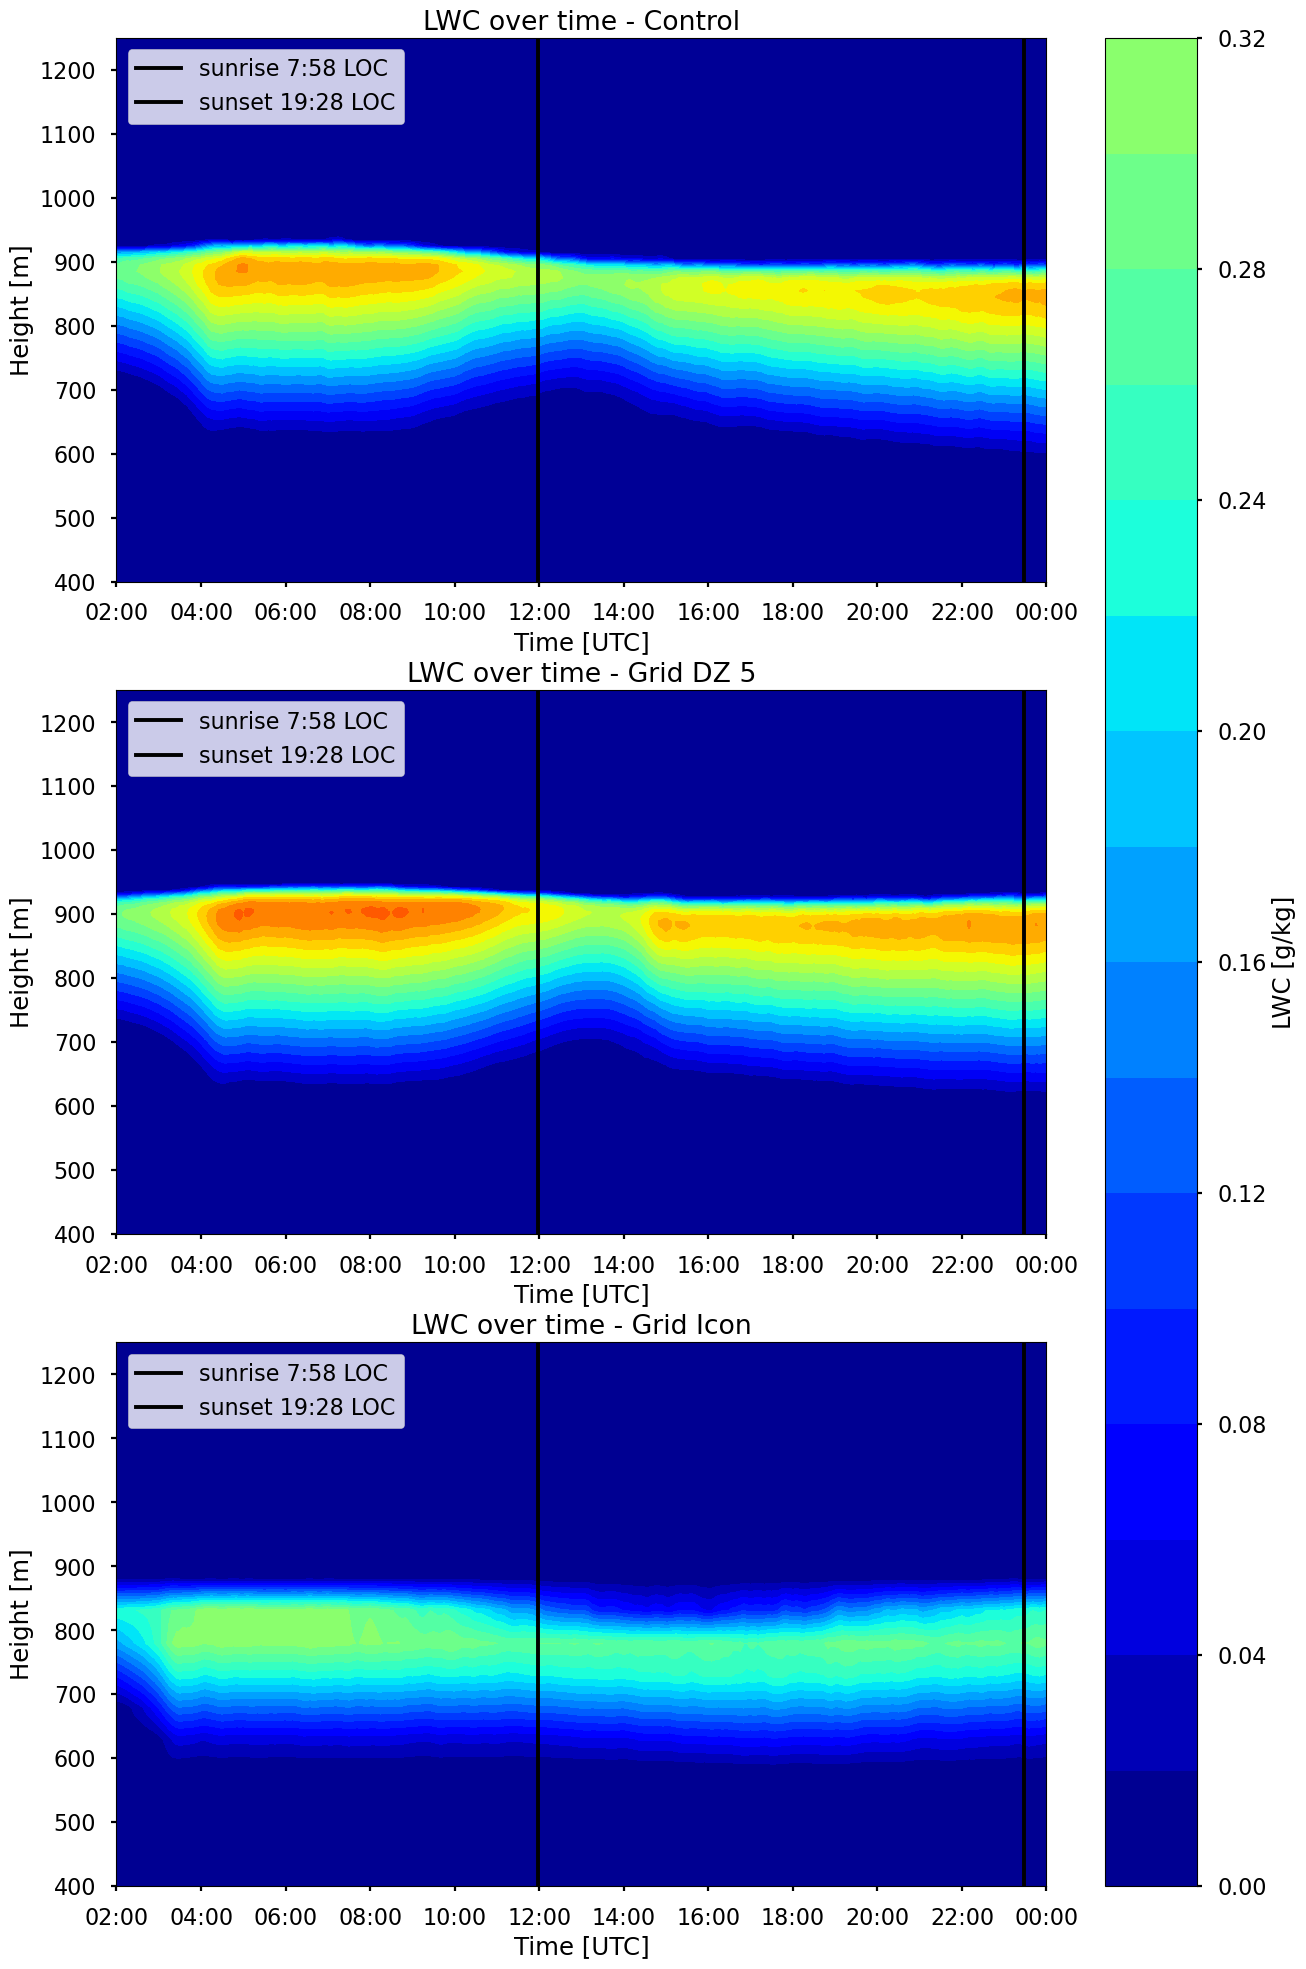

In [17]:
# Plot Funktion
def plot_lwc_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    c = ax.contourf(ucla_times, ps_ds["zt"], ps_ds["l"].T, levels=20, vmin=0, vmax=0.6, cmap="jet")
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# Plotten der Multi-Panel Plots

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], controle_psds, "Control")
plot_lwc_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_lwc_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_Plots_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes2[0], controle_psds, "Control")
plot_lwc_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_lwc_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="LWC [g/kg]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_Plots_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes3[0], controle_psds, "Control")
plot_lwc_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_lwc_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="LWC [g/kg]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_Plots_GRID.png")
plt.show()

#########################
# Make x labels beautiful

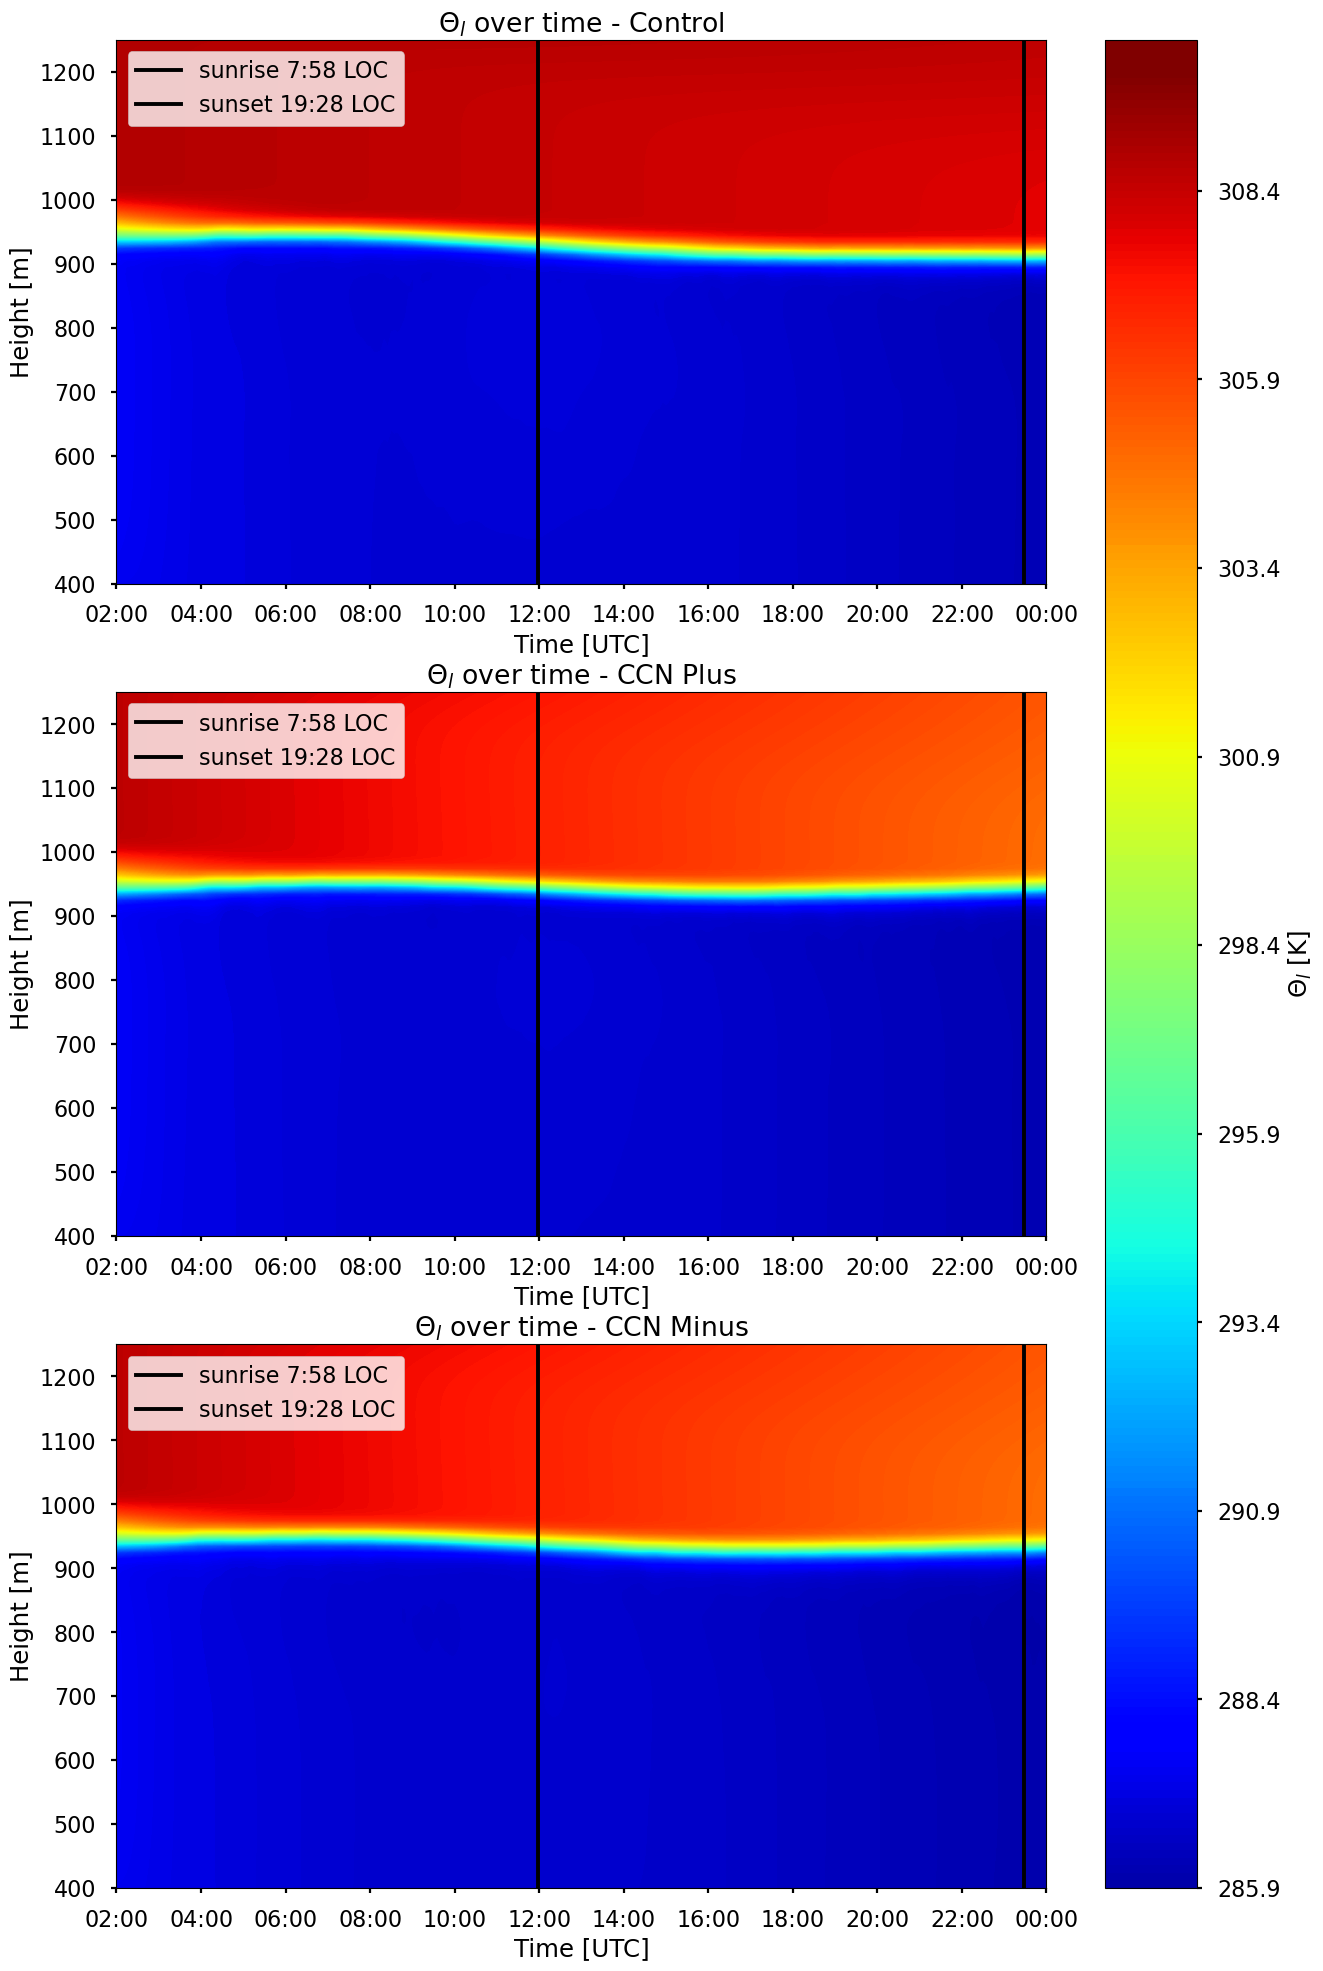

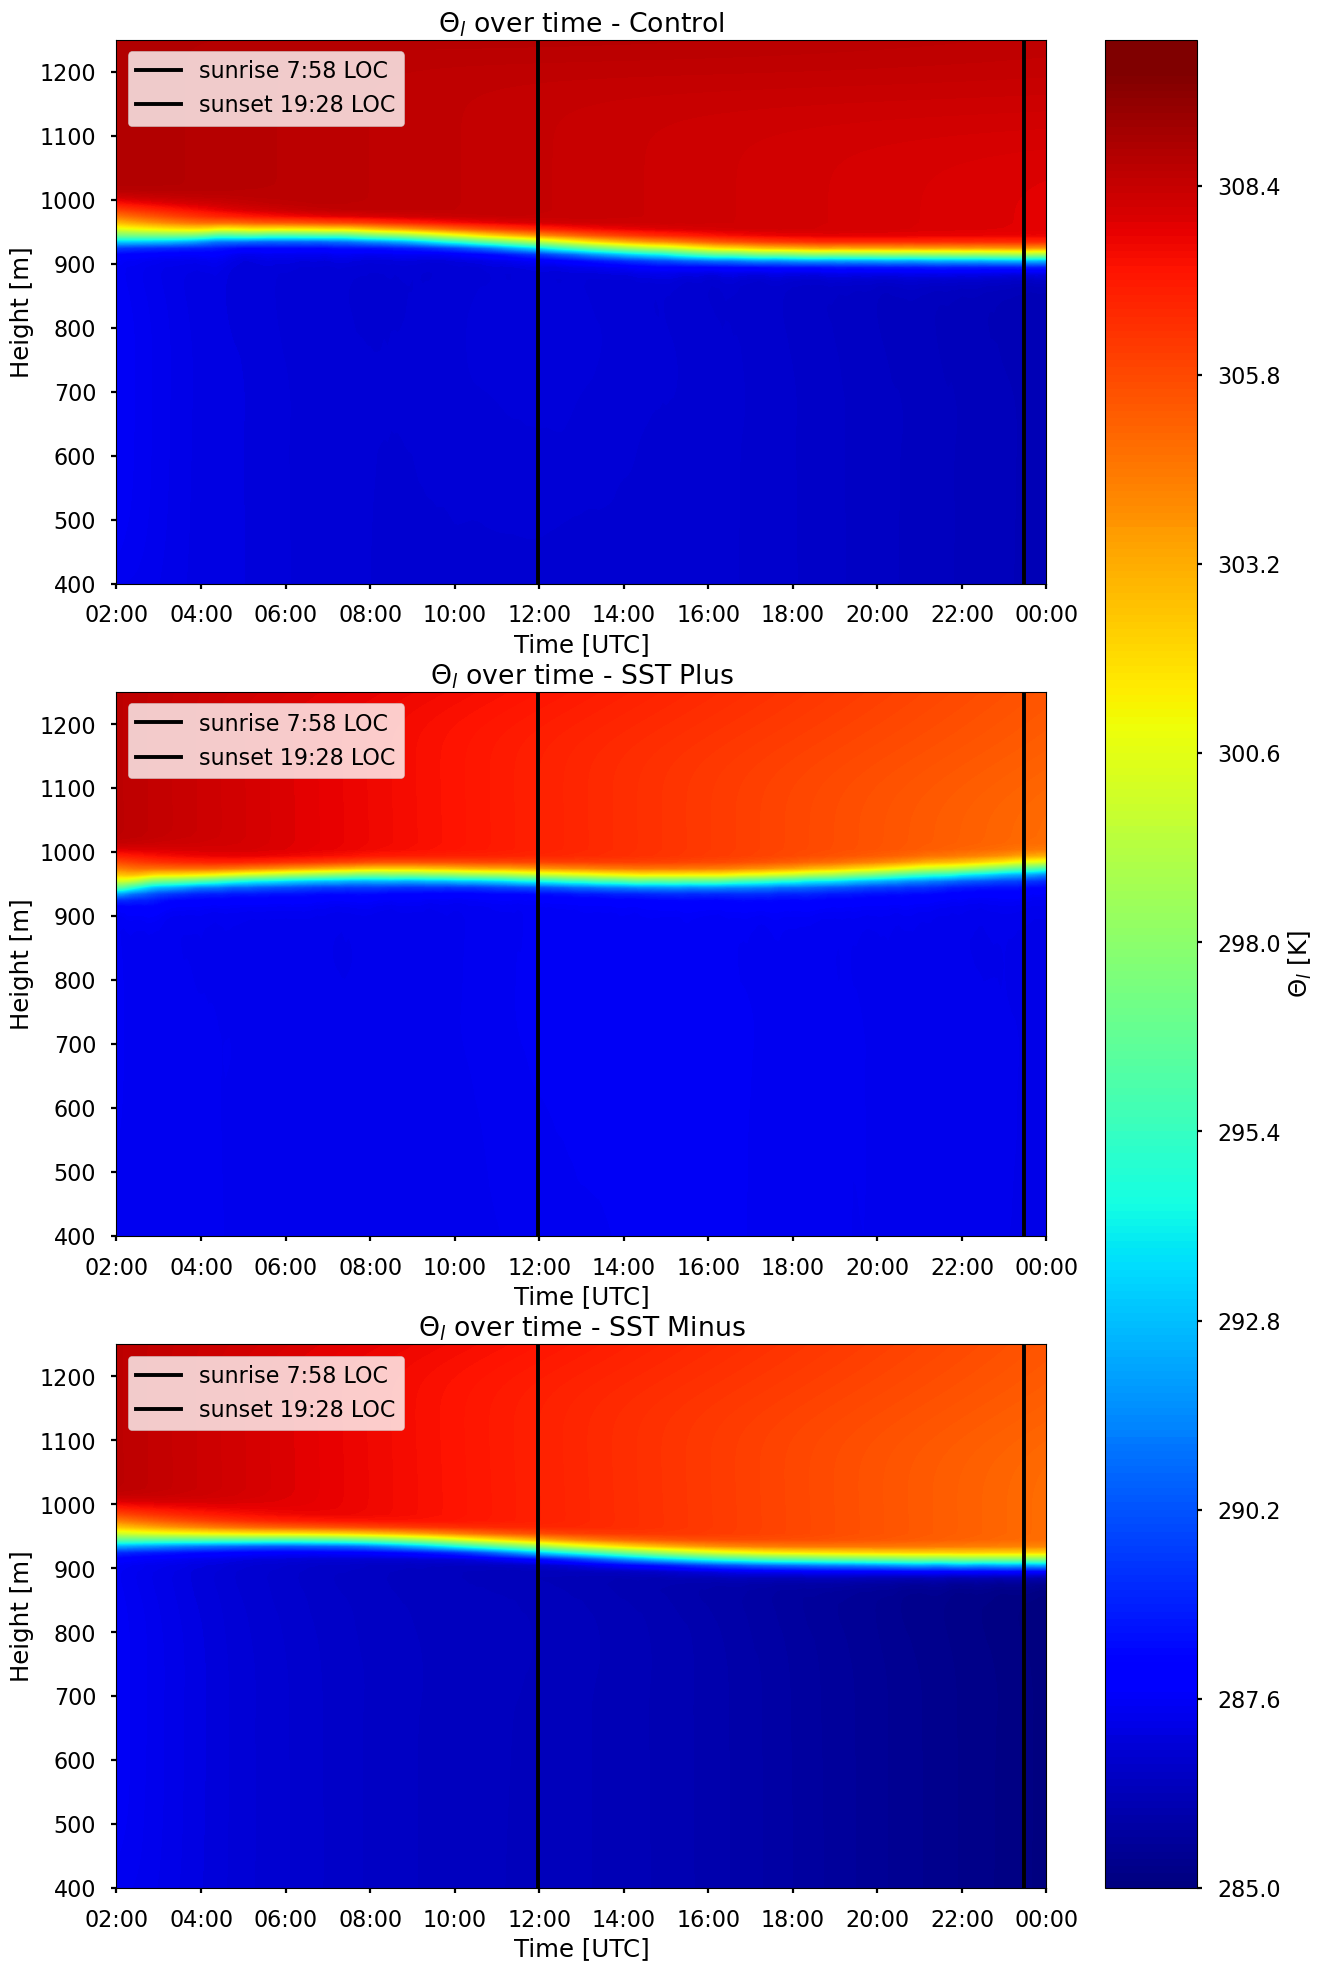

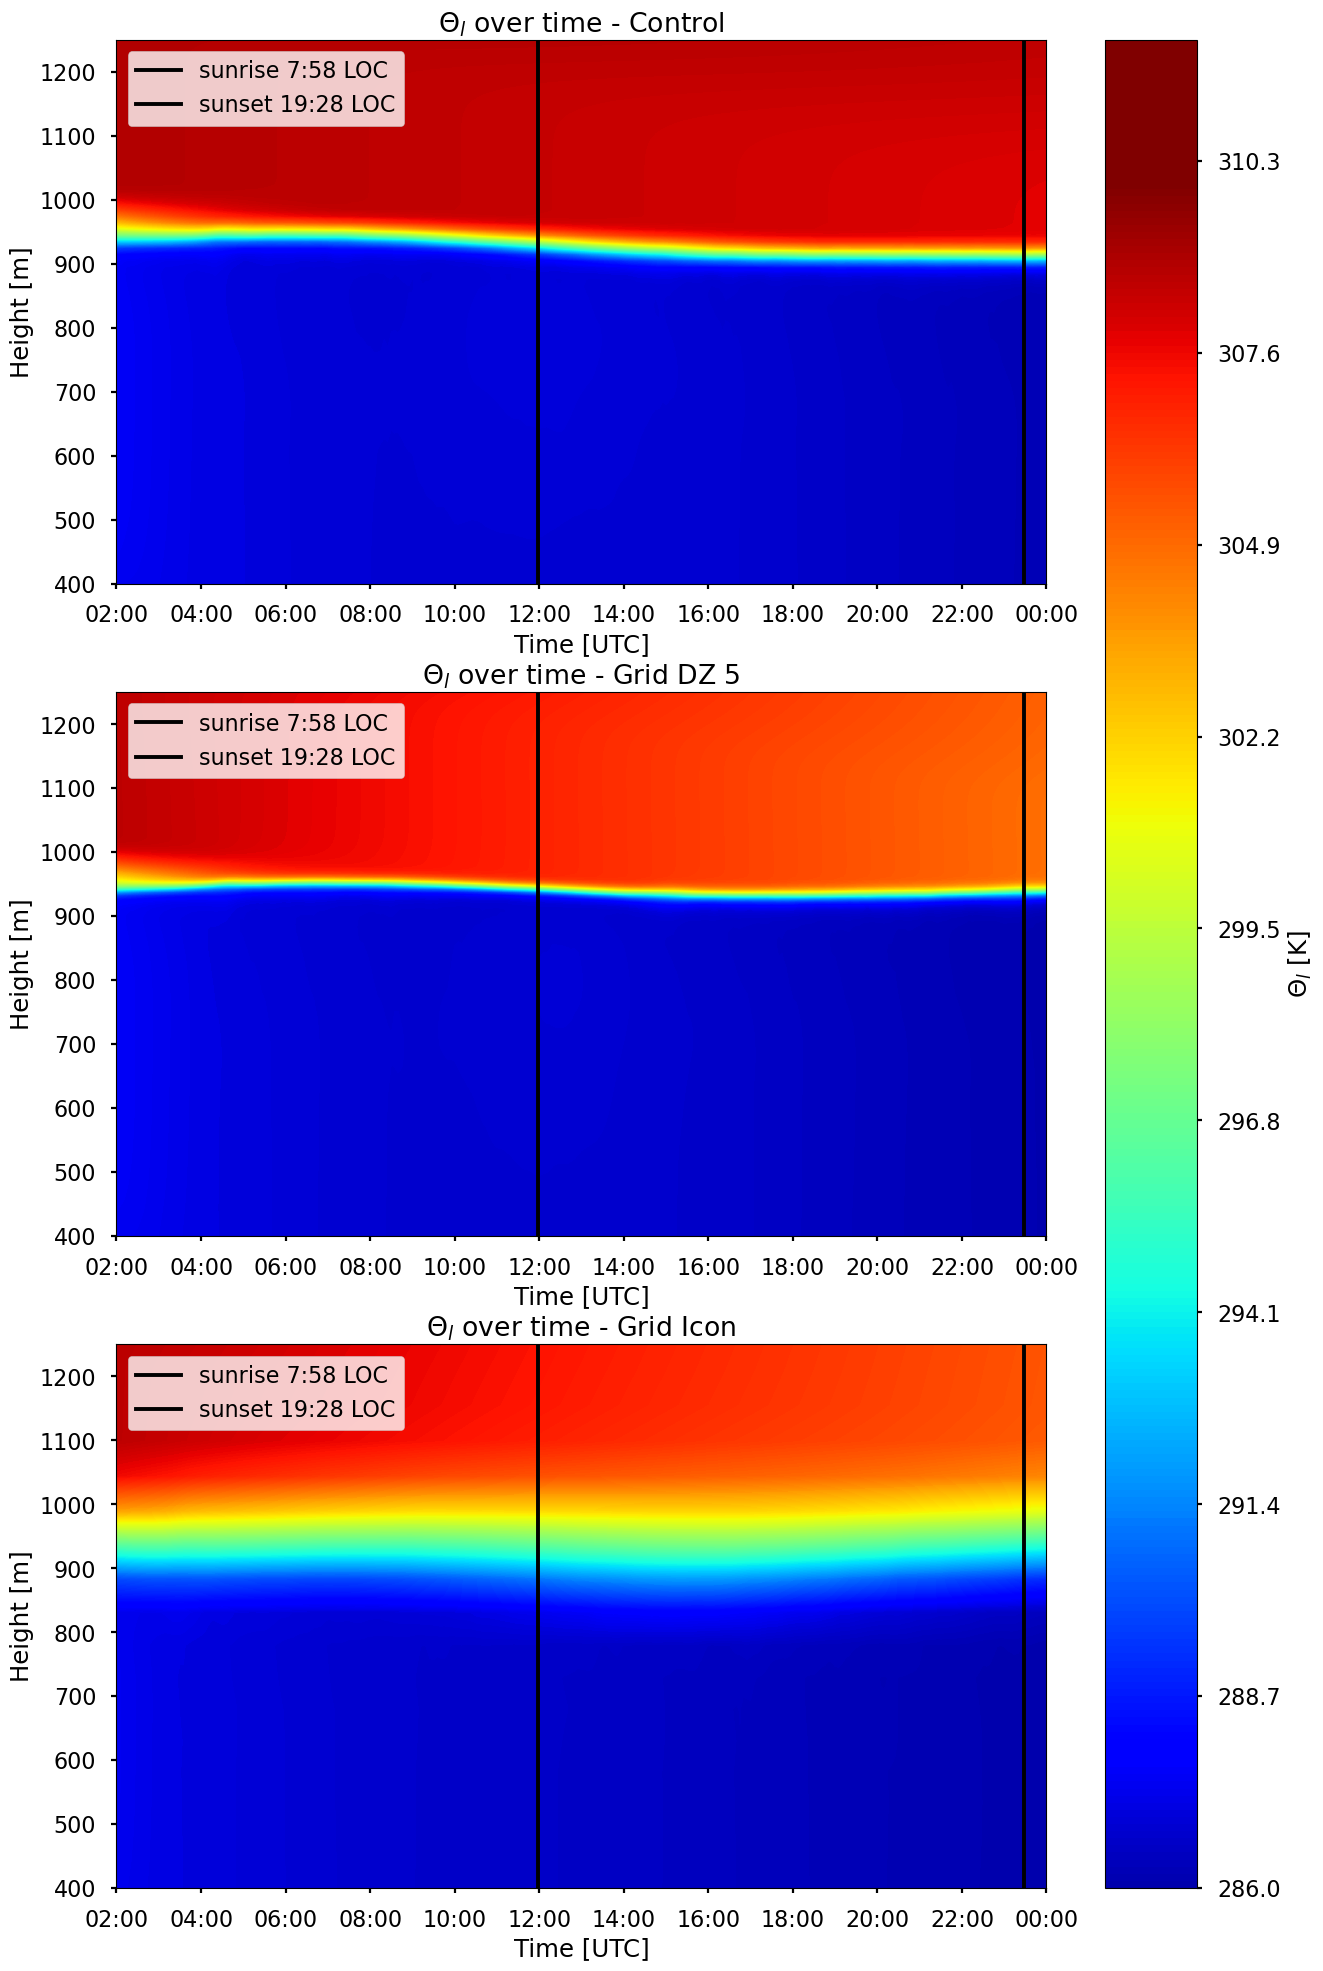

In [22]:
# Theta_l

# Plot Funktion
def plot_lwc_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    c = ax.contourf(ucla_times, ps_ds["zt"], ps_ds["t"].T, levels=280, cmap="jet", vmin=285, vmax=310)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("$\Theta_l$ over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# Plotten der Multi-Panel Plots

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], controle_psds, "Control")
plot_lwc_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_lwc_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="$\Theta_l$ [K]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Theta_l_Plots_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes2[0], controle_psds, "Control")
plot_lwc_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_lwc_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="$\Theta_l$ [K]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Theta_l_Plots_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes3[0], controle_psds, "Control")
plot_lwc_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_lwc_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="$\Theta_l$ [K]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Theta_l_Plots_GRID.png")
plt.show()

#########################
# Make x labels beautiful

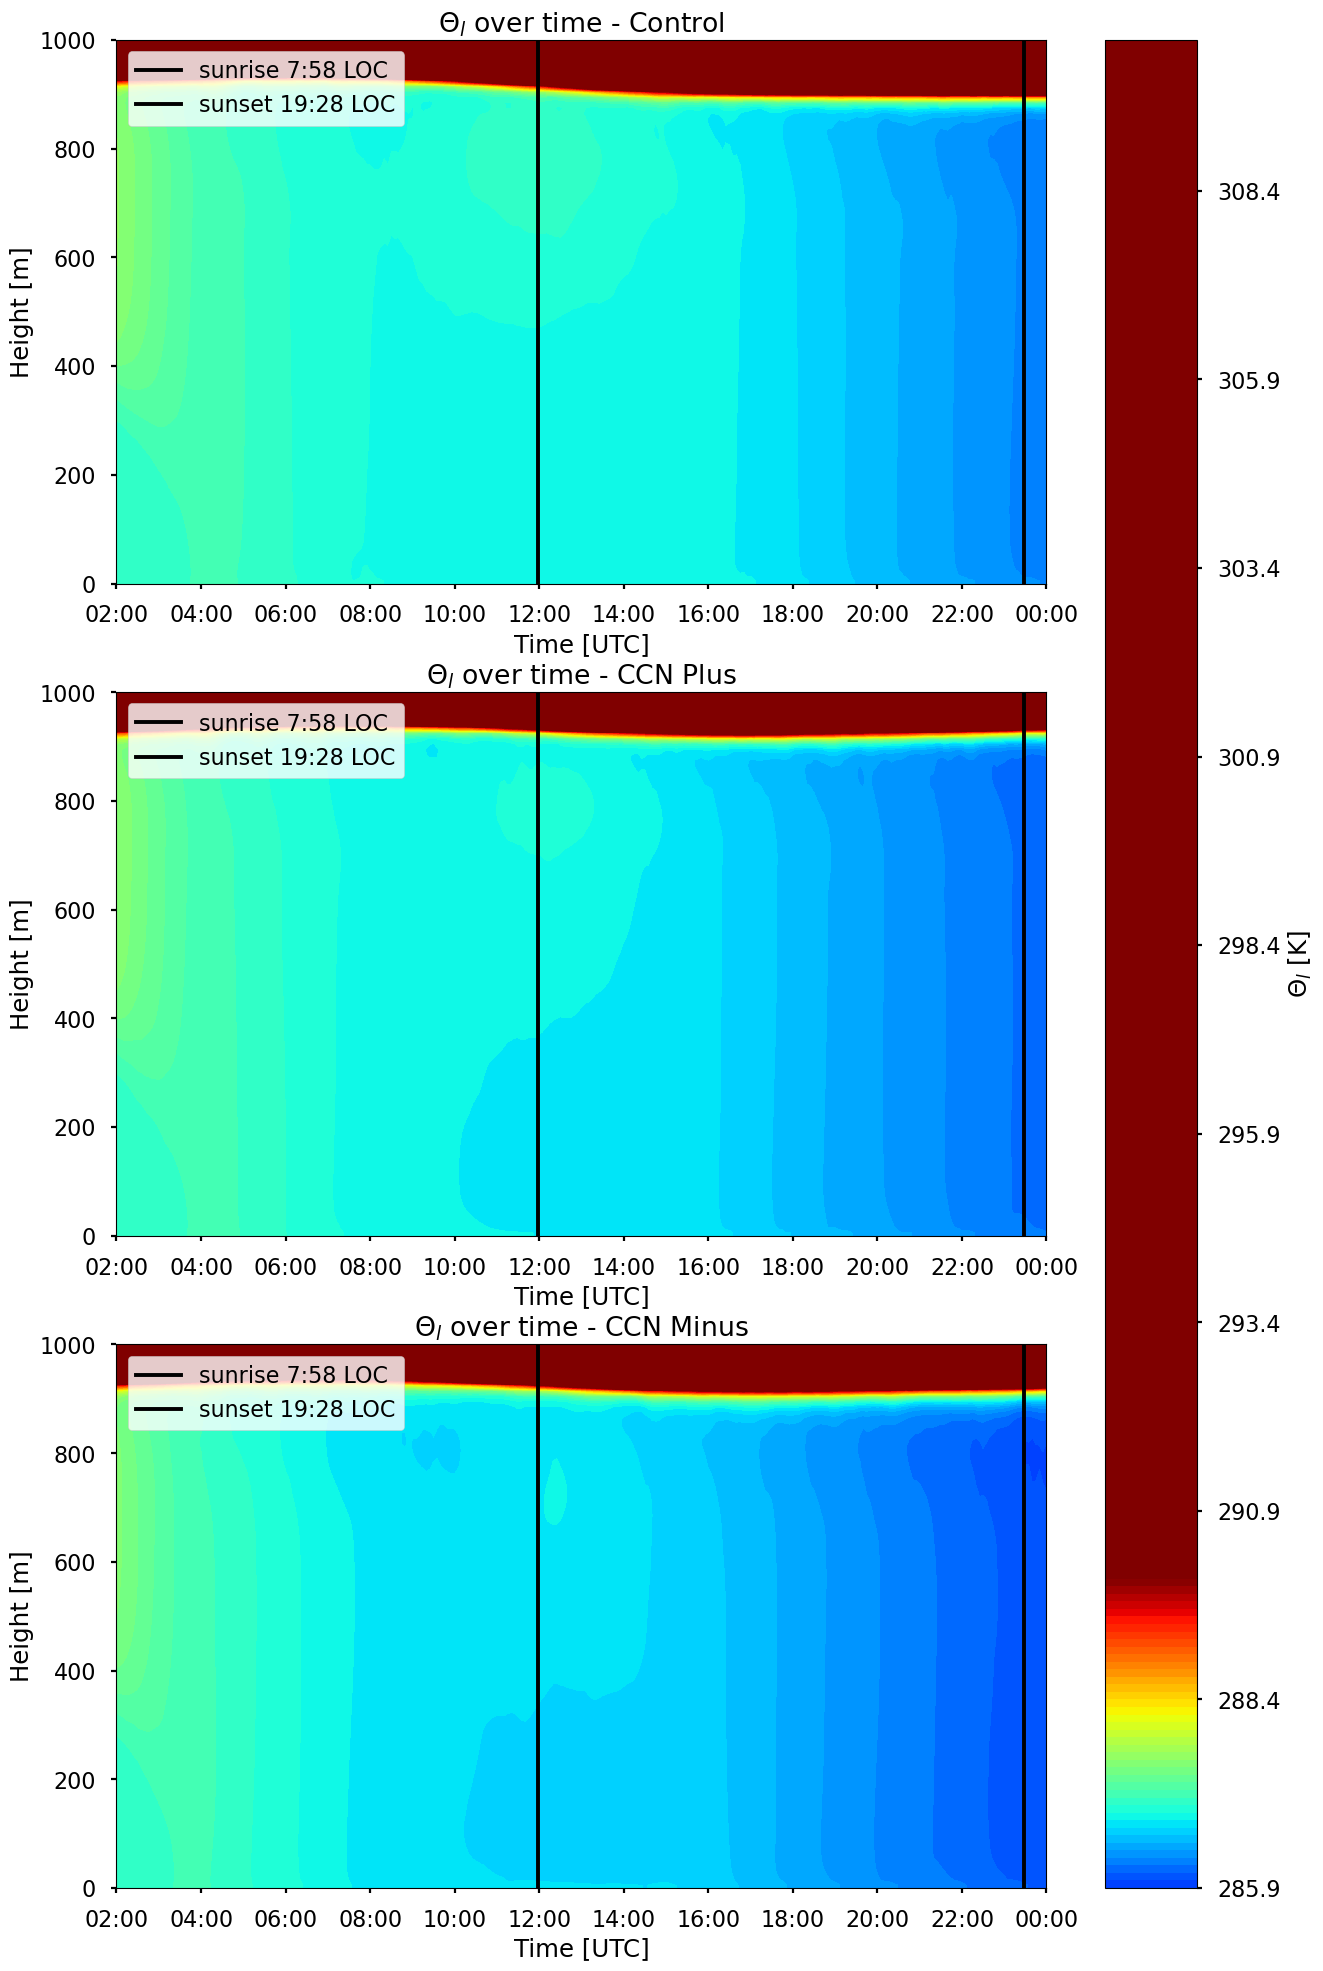

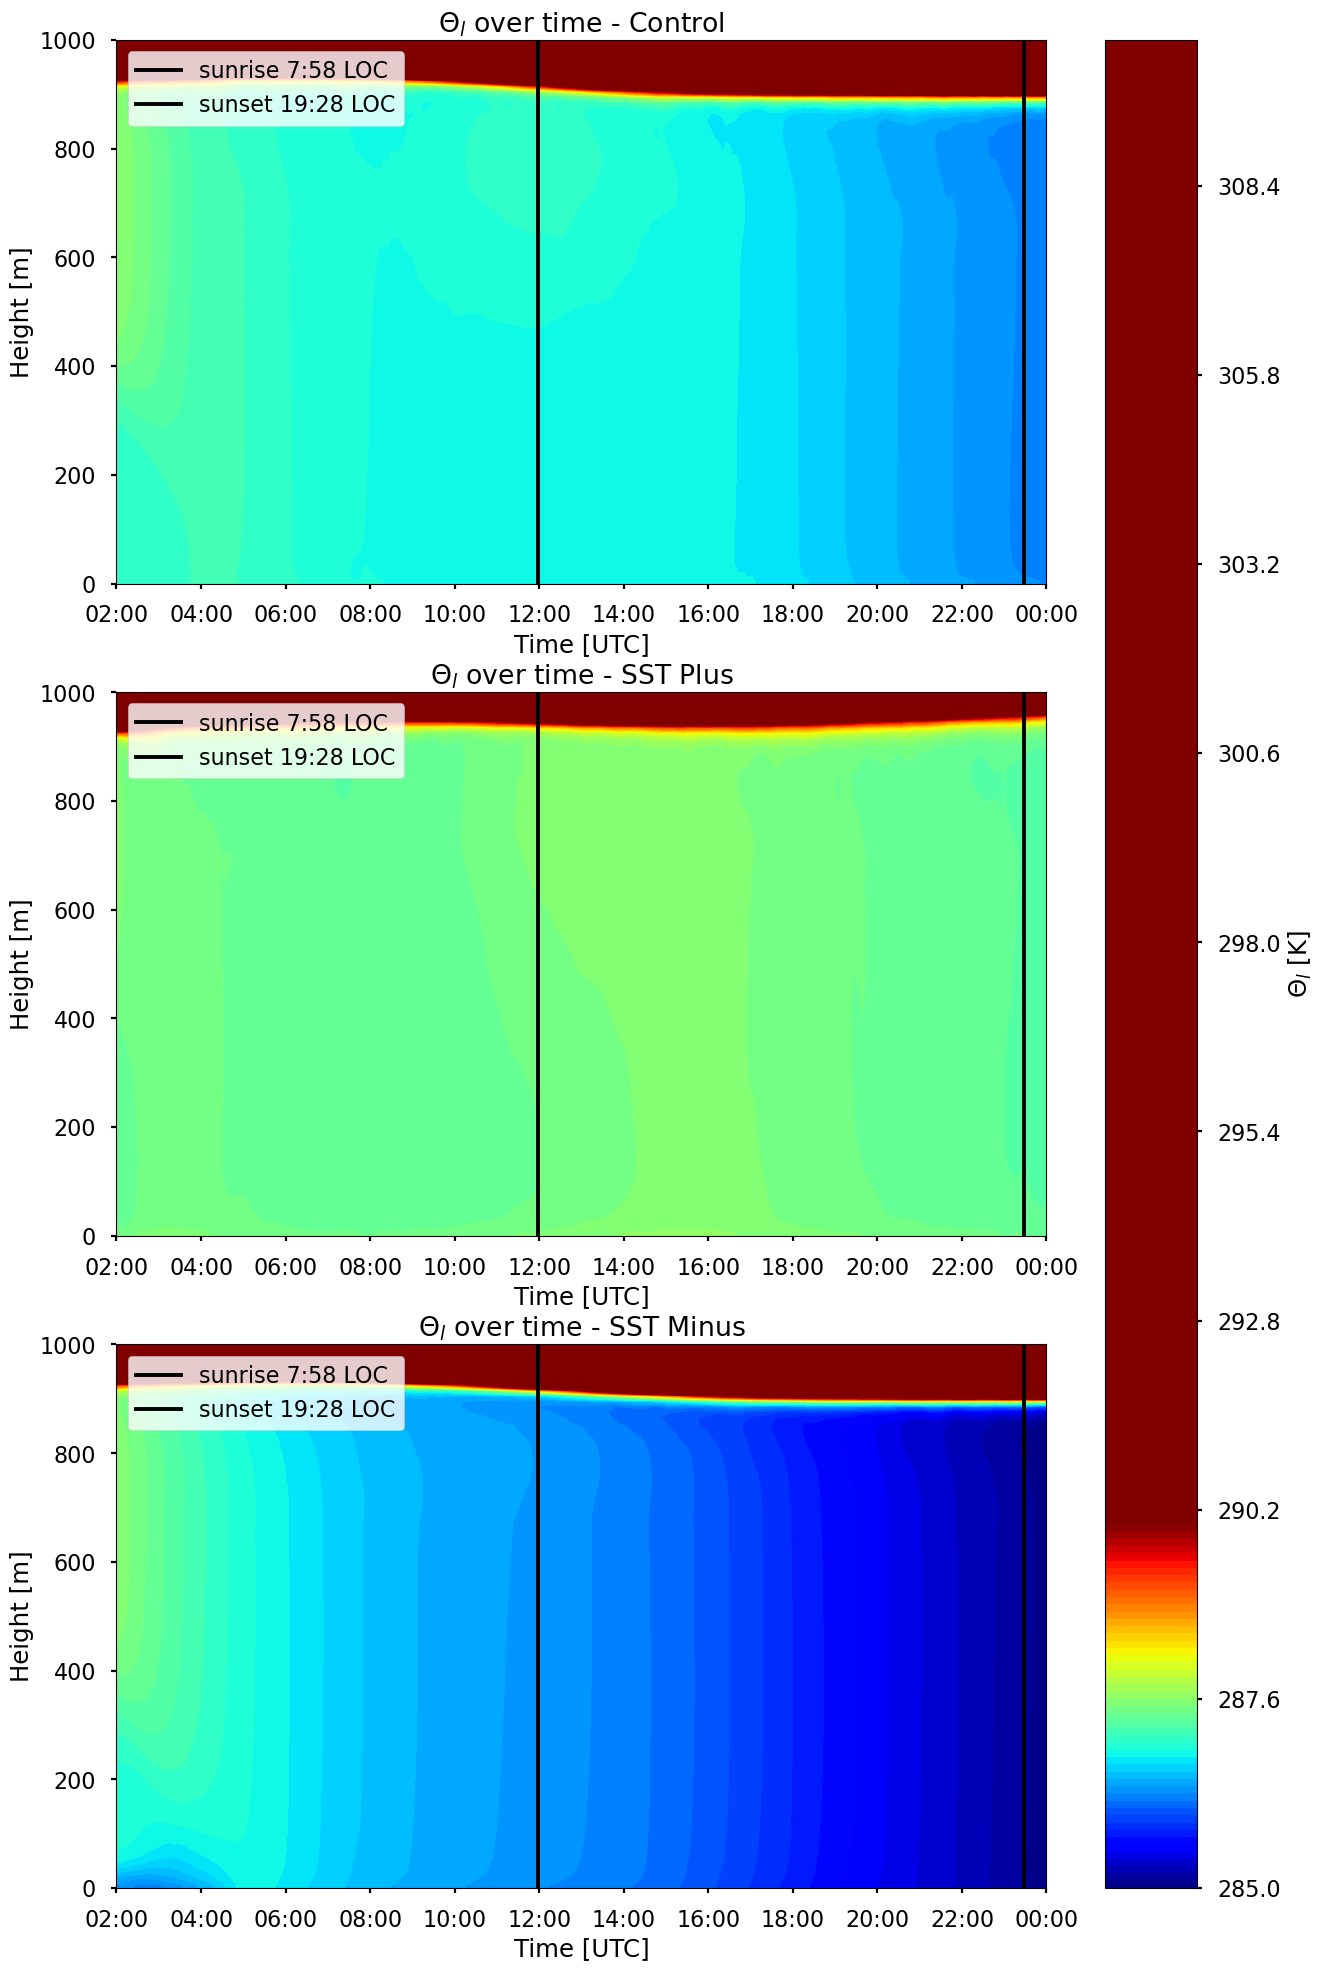

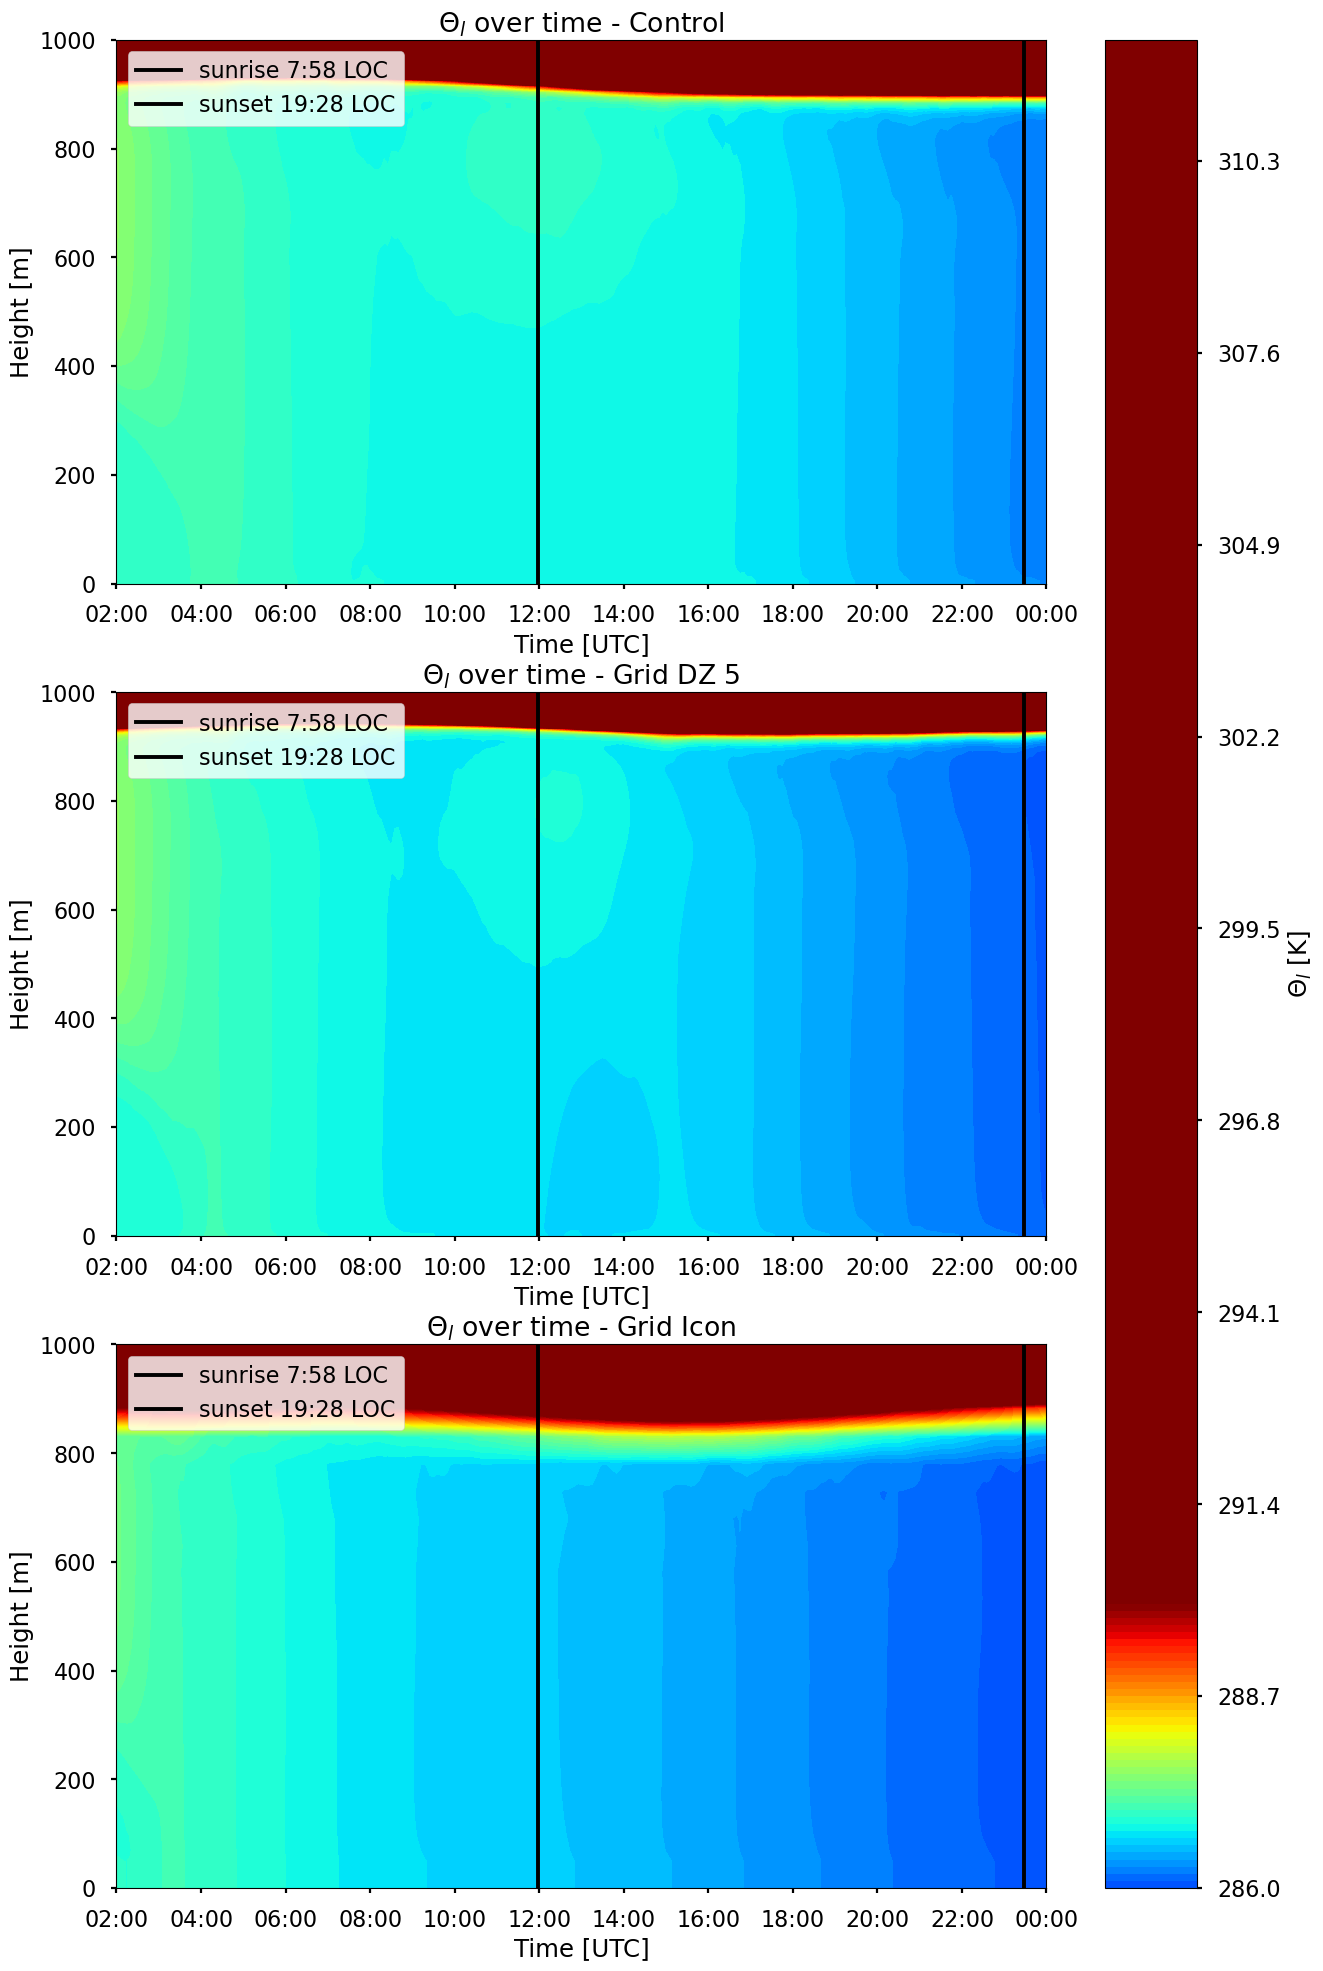

In [24]:
# Theta_l BOUNDARY LAYER HIGHLY RESOLVED!

# Plot Funktion
def plot_lwc_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    c = ax.contourf(ucla_times, ps_ds["zt"], ps_ds["t"].T, levels=280, cmap="jet", vmin=285, vmax=290)
    ax.set_ylim(0, 1000)
    ax.set_ylabel("Height [m]")
    ax.set_title("$\Theta_l$ over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# Plotten der Multi-Panel Plots

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], controle_psds, "Control")
plot_lwc_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_lwc_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="$\Theta_l$ [K]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "BL_MultiPanel_Theta_l_Plots_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes2[0], controle_psds, "Control")
plot_lwc_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_lwc_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="$\Theta_l$ [K]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "BL_MultiPanel_Theta_l_Plots_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes3[0], controle_psds, "Control")
plot_lwc_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_lwc_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="$\Theta_l$ [K]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "BL_MultiPanel_Theta_l_Plots_GRID.png")
plt.show()

#########################
# Make x labels beautiful

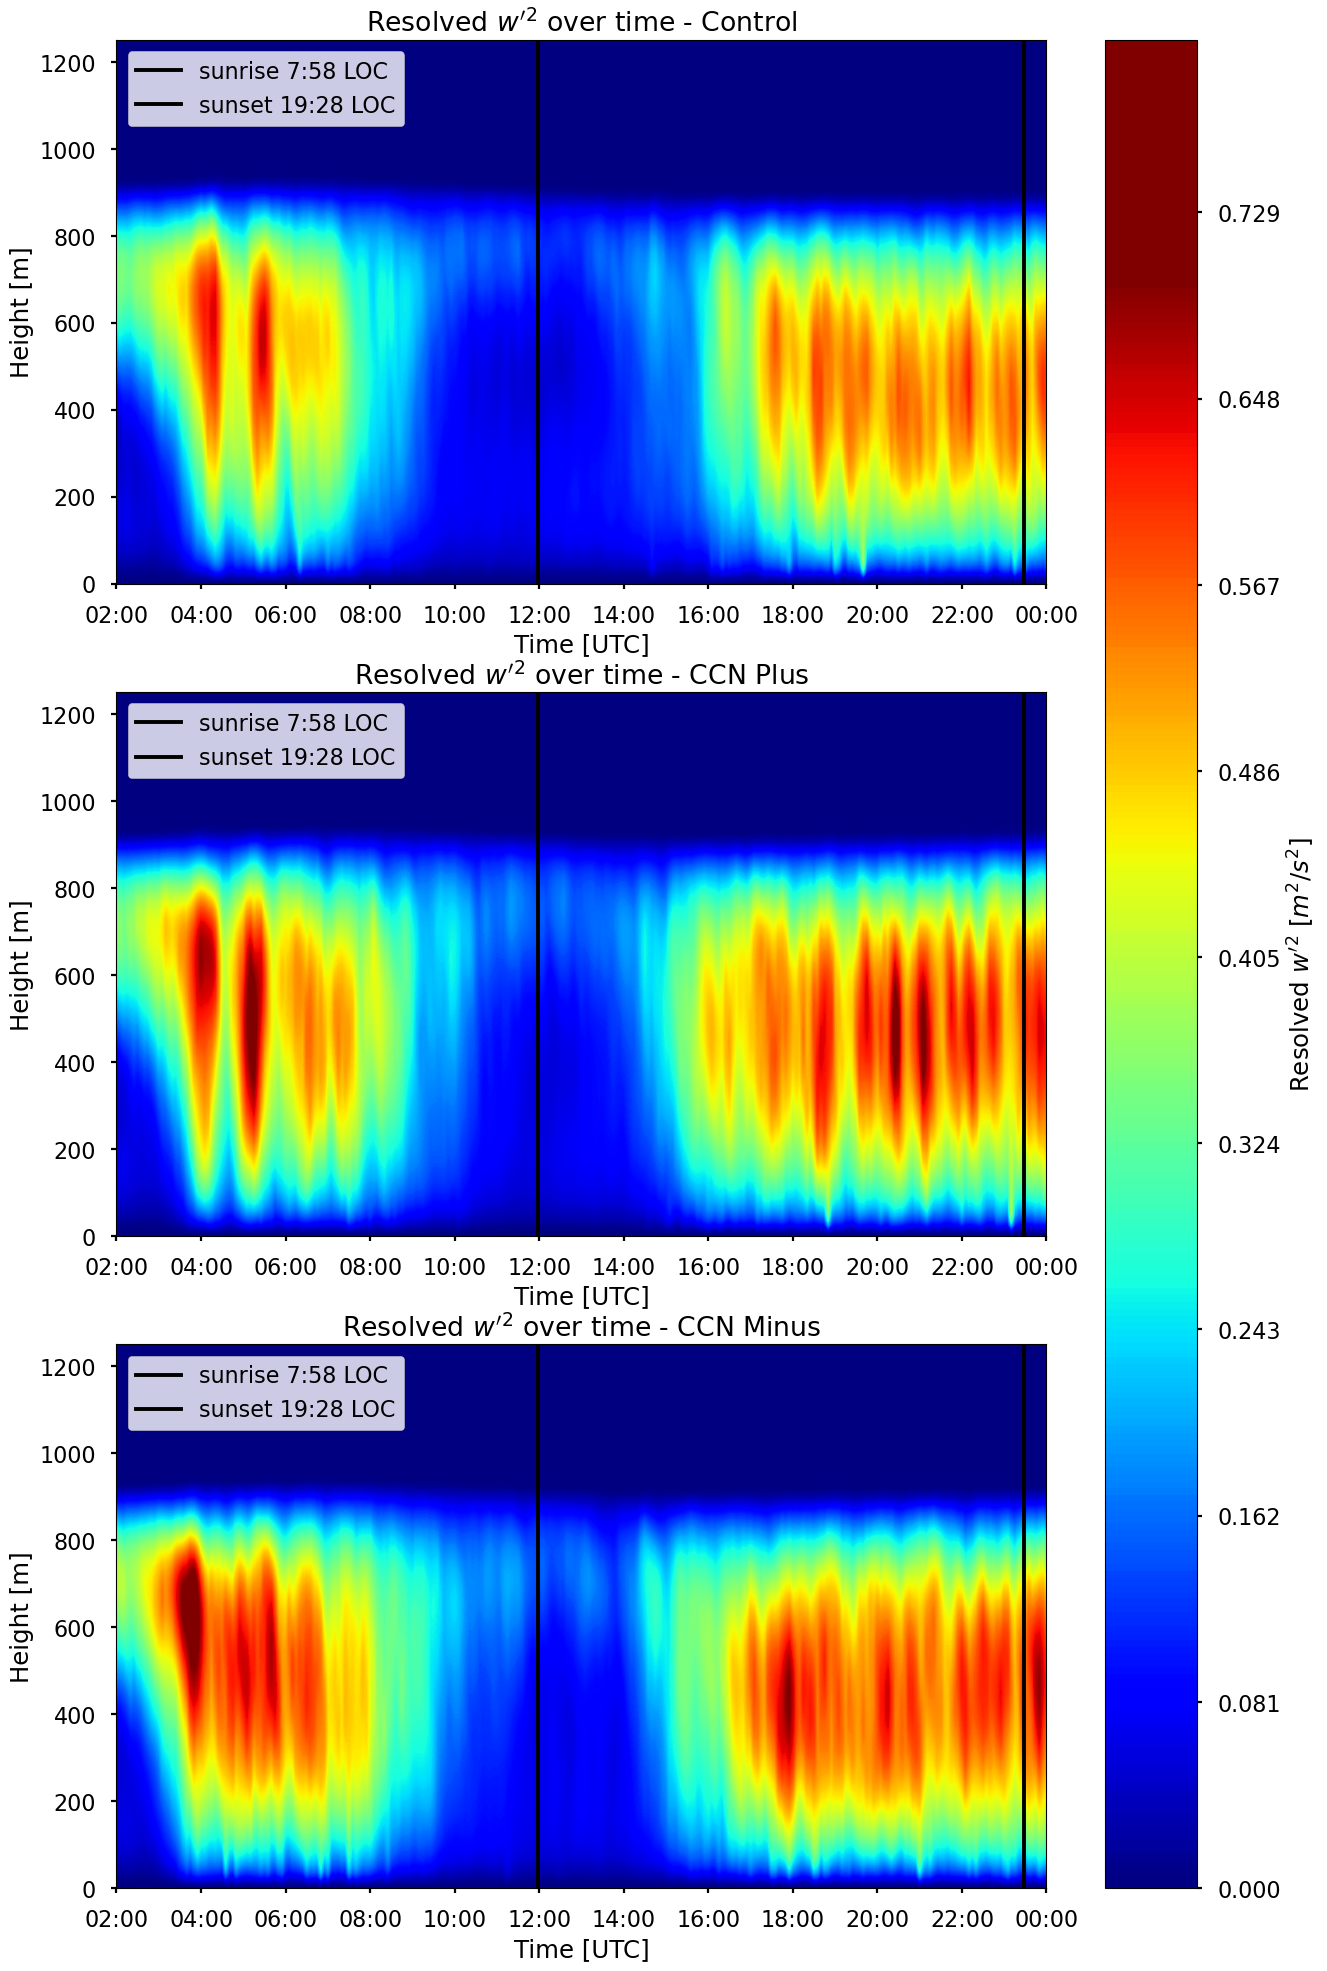

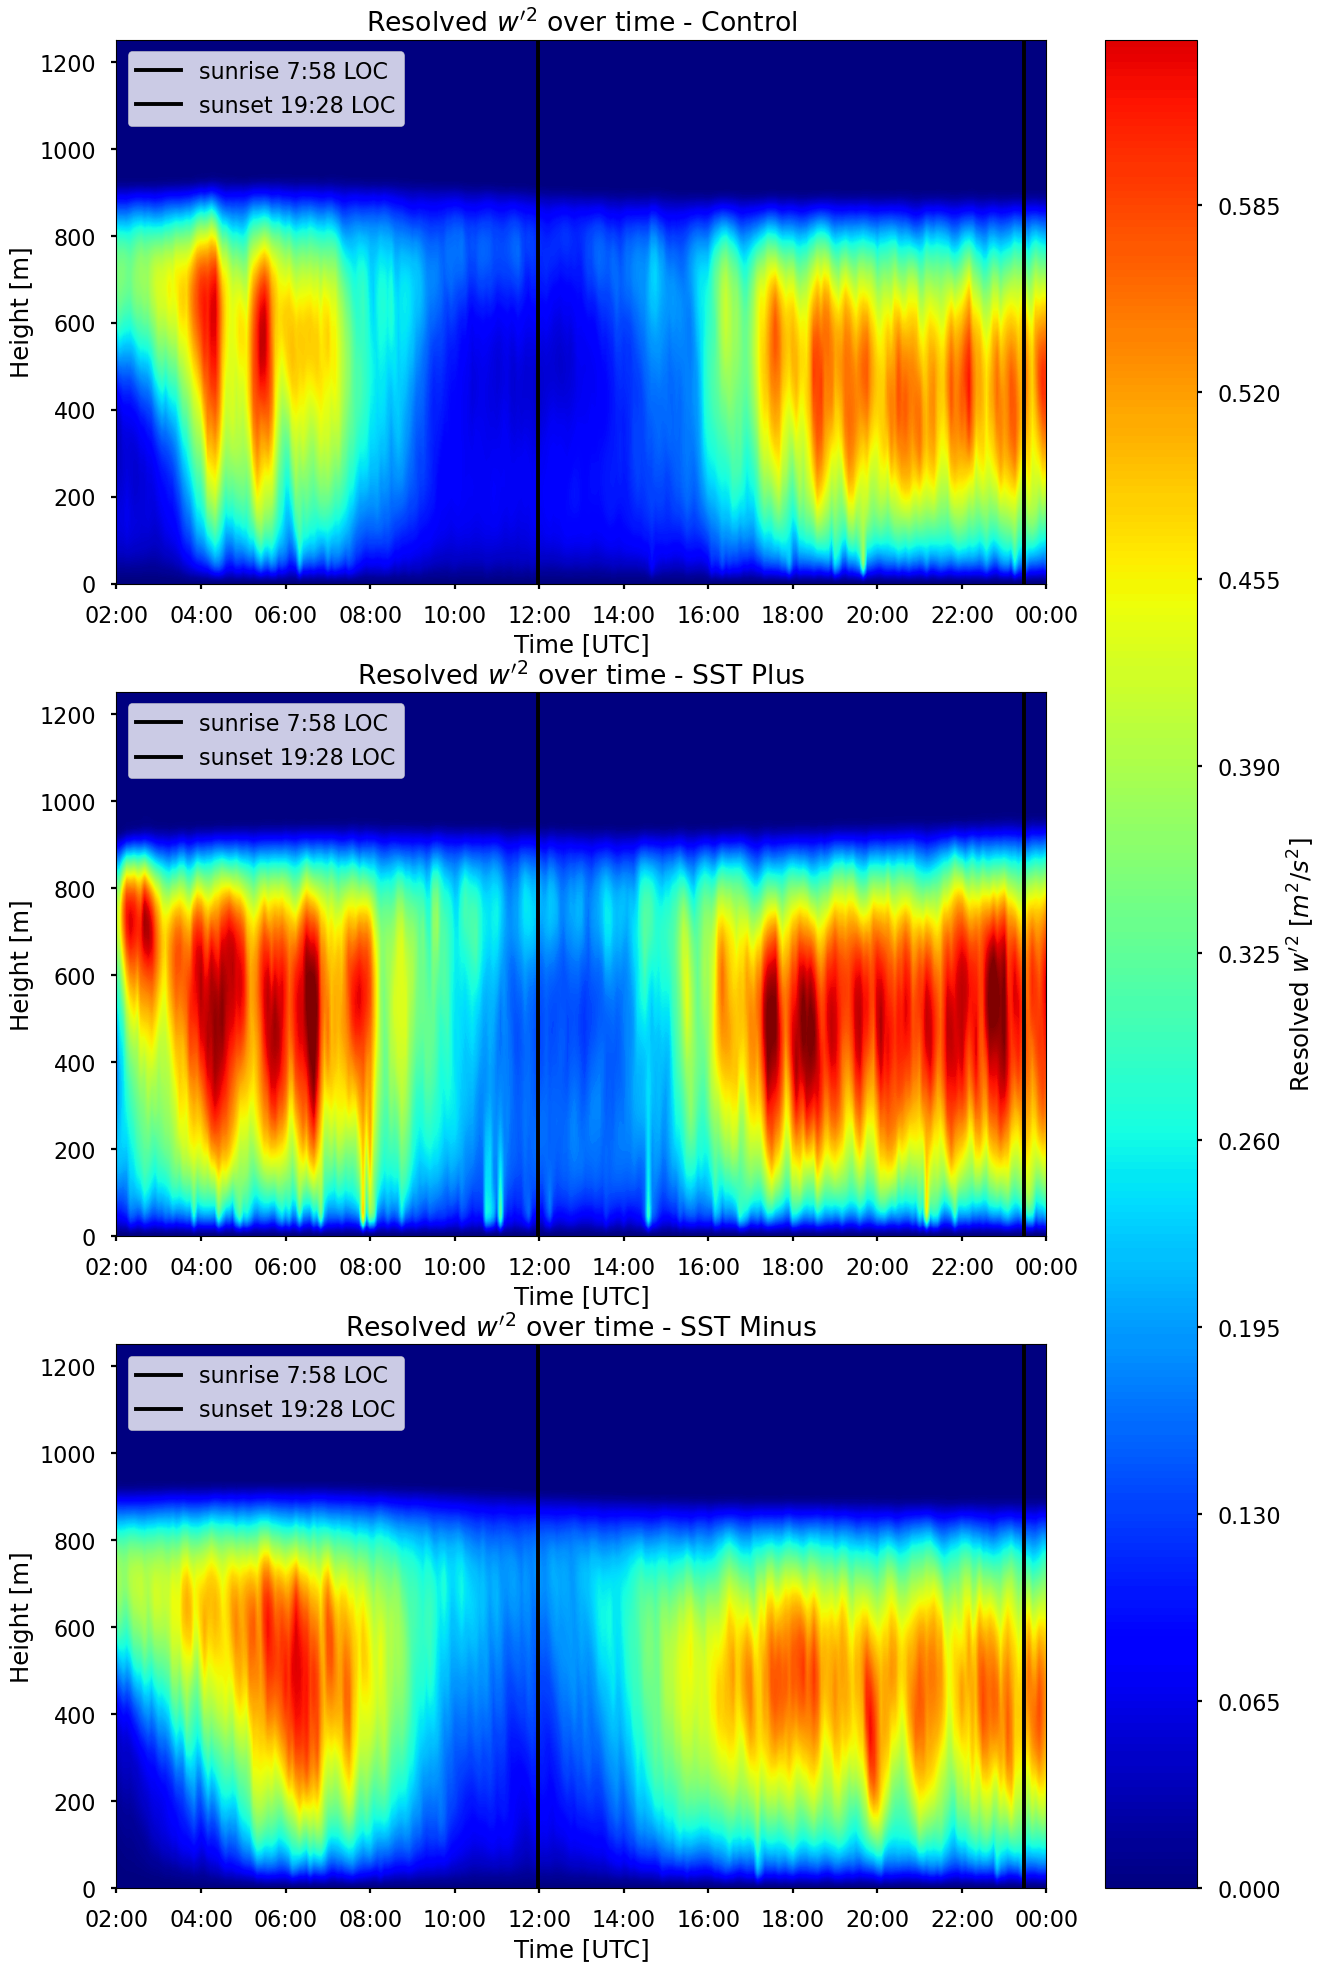

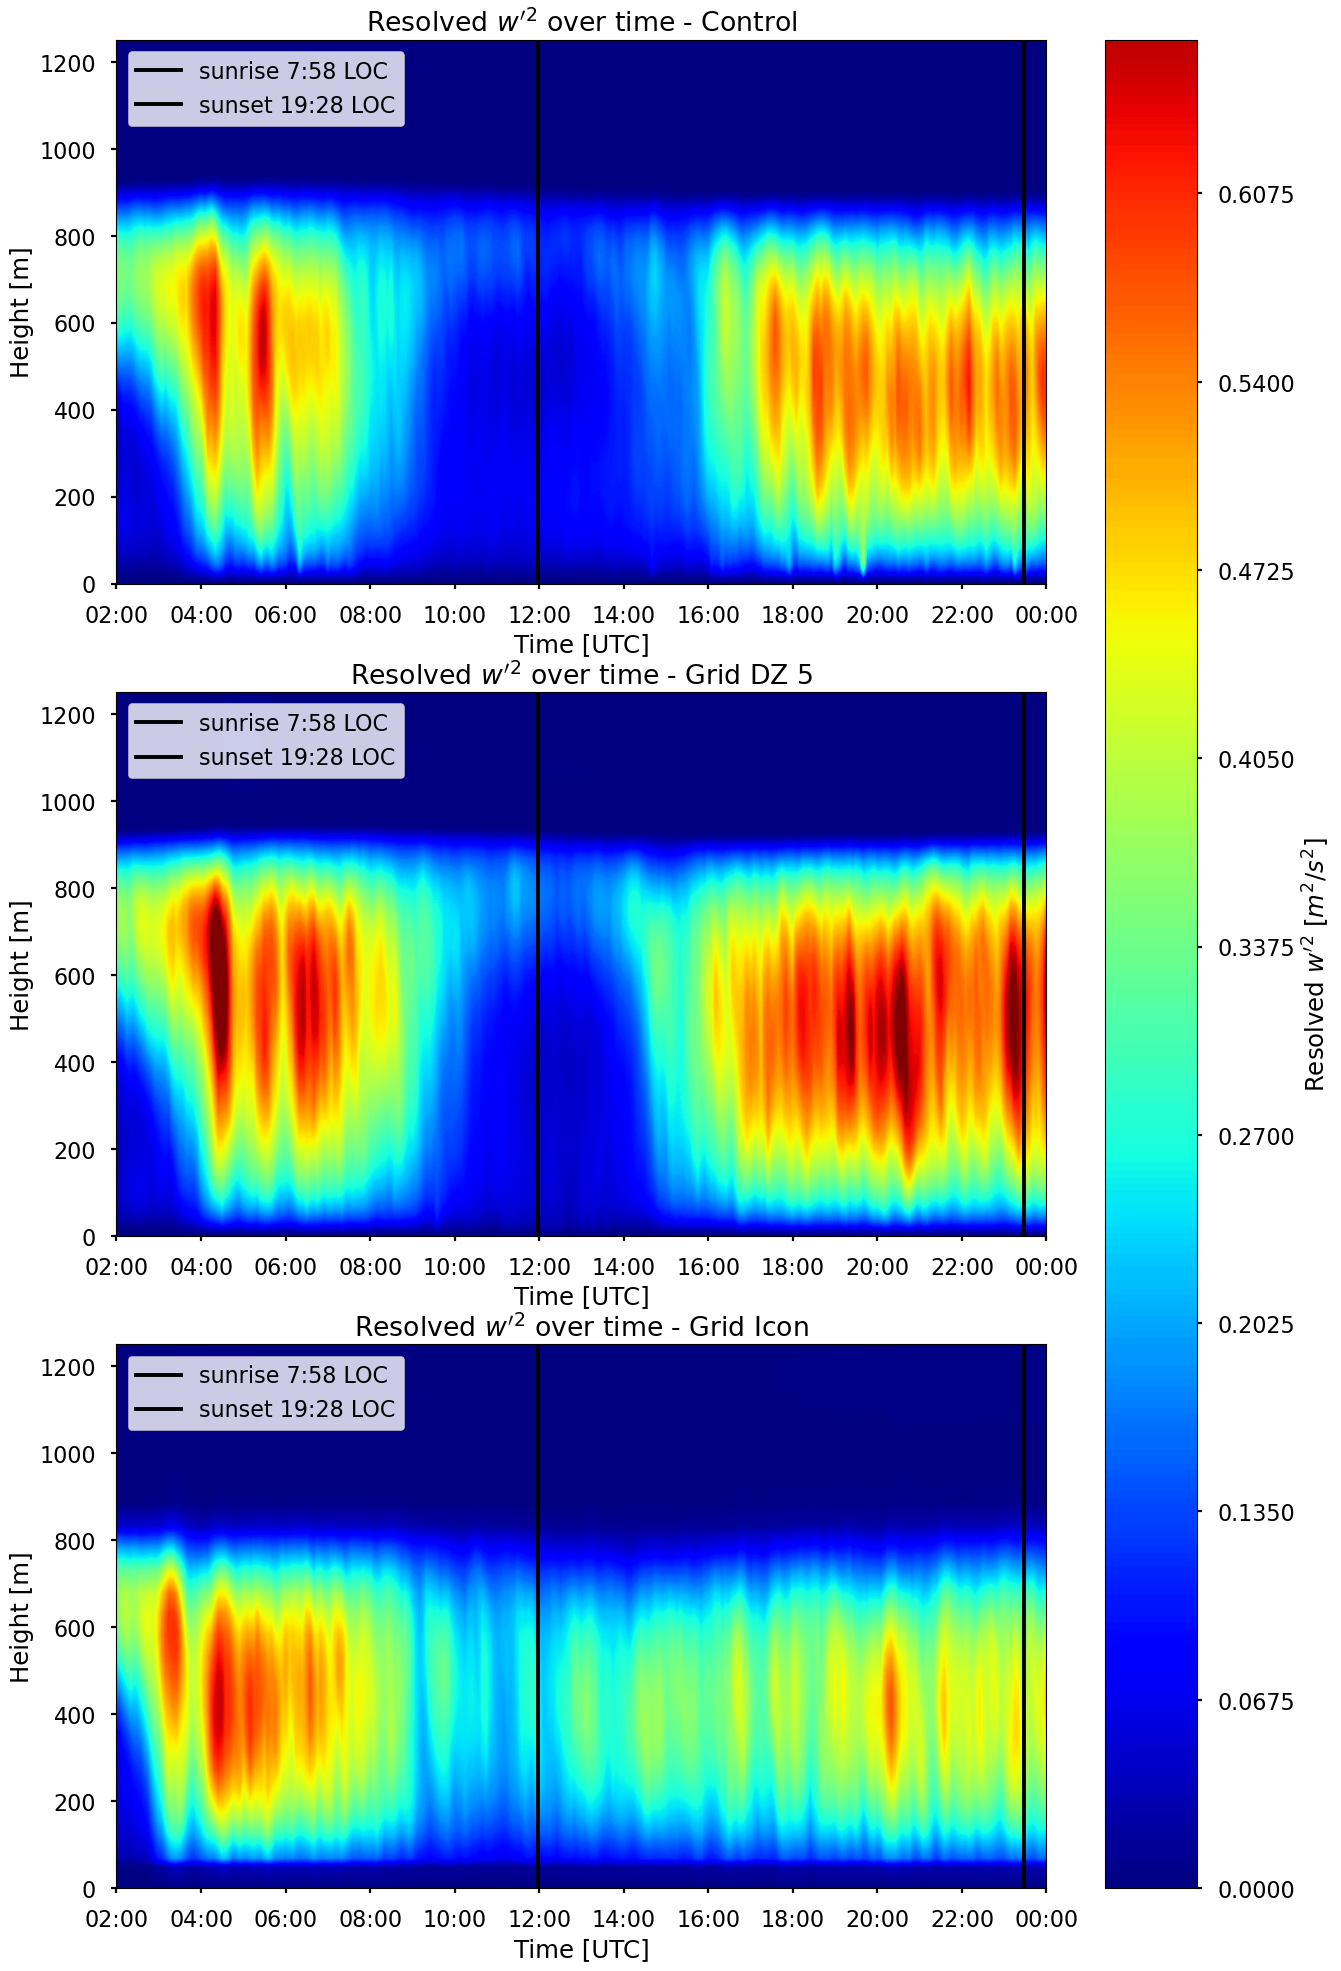

In [23]:
# Calculate w'^2
def calculate_w_squared_resolved(ds):
    return ds['tot_ww'] - ds['sfs_ww']

# Updated plot function for w'^2
def plot_w_squared_over_time(ax, ps_ds, name):
    ucla_times = ucla_time2useful_time(ps_ds["time"].values)
    w_squared_resolved = calculate_w_squared_resolved(ps_ds)
    c = ax.contourf(ucla_times, ps_ds["zt"], w_squared_resolved.T, levels=280, cmap="jet", vmin=0, vmax=0.7)
    ax.set_ylim(0, 1250)  # Set lower limit to 0
    ax.set_ylabel("Height [m]")
    ax.set_title("Resolved $w'^2$ over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

# 1. Figure: controle, ccn plus, ccn minus
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_w_squared_over_time(axes1[0], controle_psds, "Control")
plot_w_squared_over_time(axes1[1], ds_ccn_plus, "CCN Plus")
c1 = plot_w_squared_over_time(axes1[2], ds_ccn_minus, "CCN Minus")
fig1.colorbar(c1, ax=axes1[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_CCNP.png")
plt.show()

# 2. Figure: controle, sst plus, sst minus
fig2, axes2 = plt.subplots(3, 1, figsize=(15, 24))

plot_w_squared_over_time(axes2[0], controle_psds, "Control")
plot_w_squared_over_time(axes2[1], sstplus_psds, "SST Plus")
c2 = plot_w_squared_over_time(axes2[2], sst_minus_psds, "SST Minus")
fig2.colorbar(c2, ax=axes2[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes2:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_SST.png")
plt.show()

# 3. Figure: controle, grid dz 5, grid icon
fig3, axes3 = plt.subplots(3, 1, figsize=(15, 24))

plot_w_squared_over_time(axes3[0], controle_psds, "Control")
plot_w_squared_over_time(axes3[1], grid5_00_psds, "Grid DZ 5")
c3 = plot_w_squared_over_time(axes3[2], grid_icon_00_psds, "Grid Icon")
fig3.colorbar(c3, ax=axes3[:], label="Resolved $w'^2$ [$m^2/s^2$]")

for ax in axes3:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_Resolved_w_squared_GRID.png")
plt.show()

In [21]:
# Calculate rain rate for UCLA:

print(controle_tsds["prcp"])

<xarray.DataArray 'prcp' (time: 5281)> Size: 21kB
array([4.920107e-11, 4.933517e-11, 4.947252e-11, ..., 3.214235e-03,
       4.265665e-03, 2.591823e-04], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 42kB 2000-01-01T02:00:00 ... 2000-01-02
Attributes:
    longname:  Surface precipitation rate
    units:     kg/kg m/s


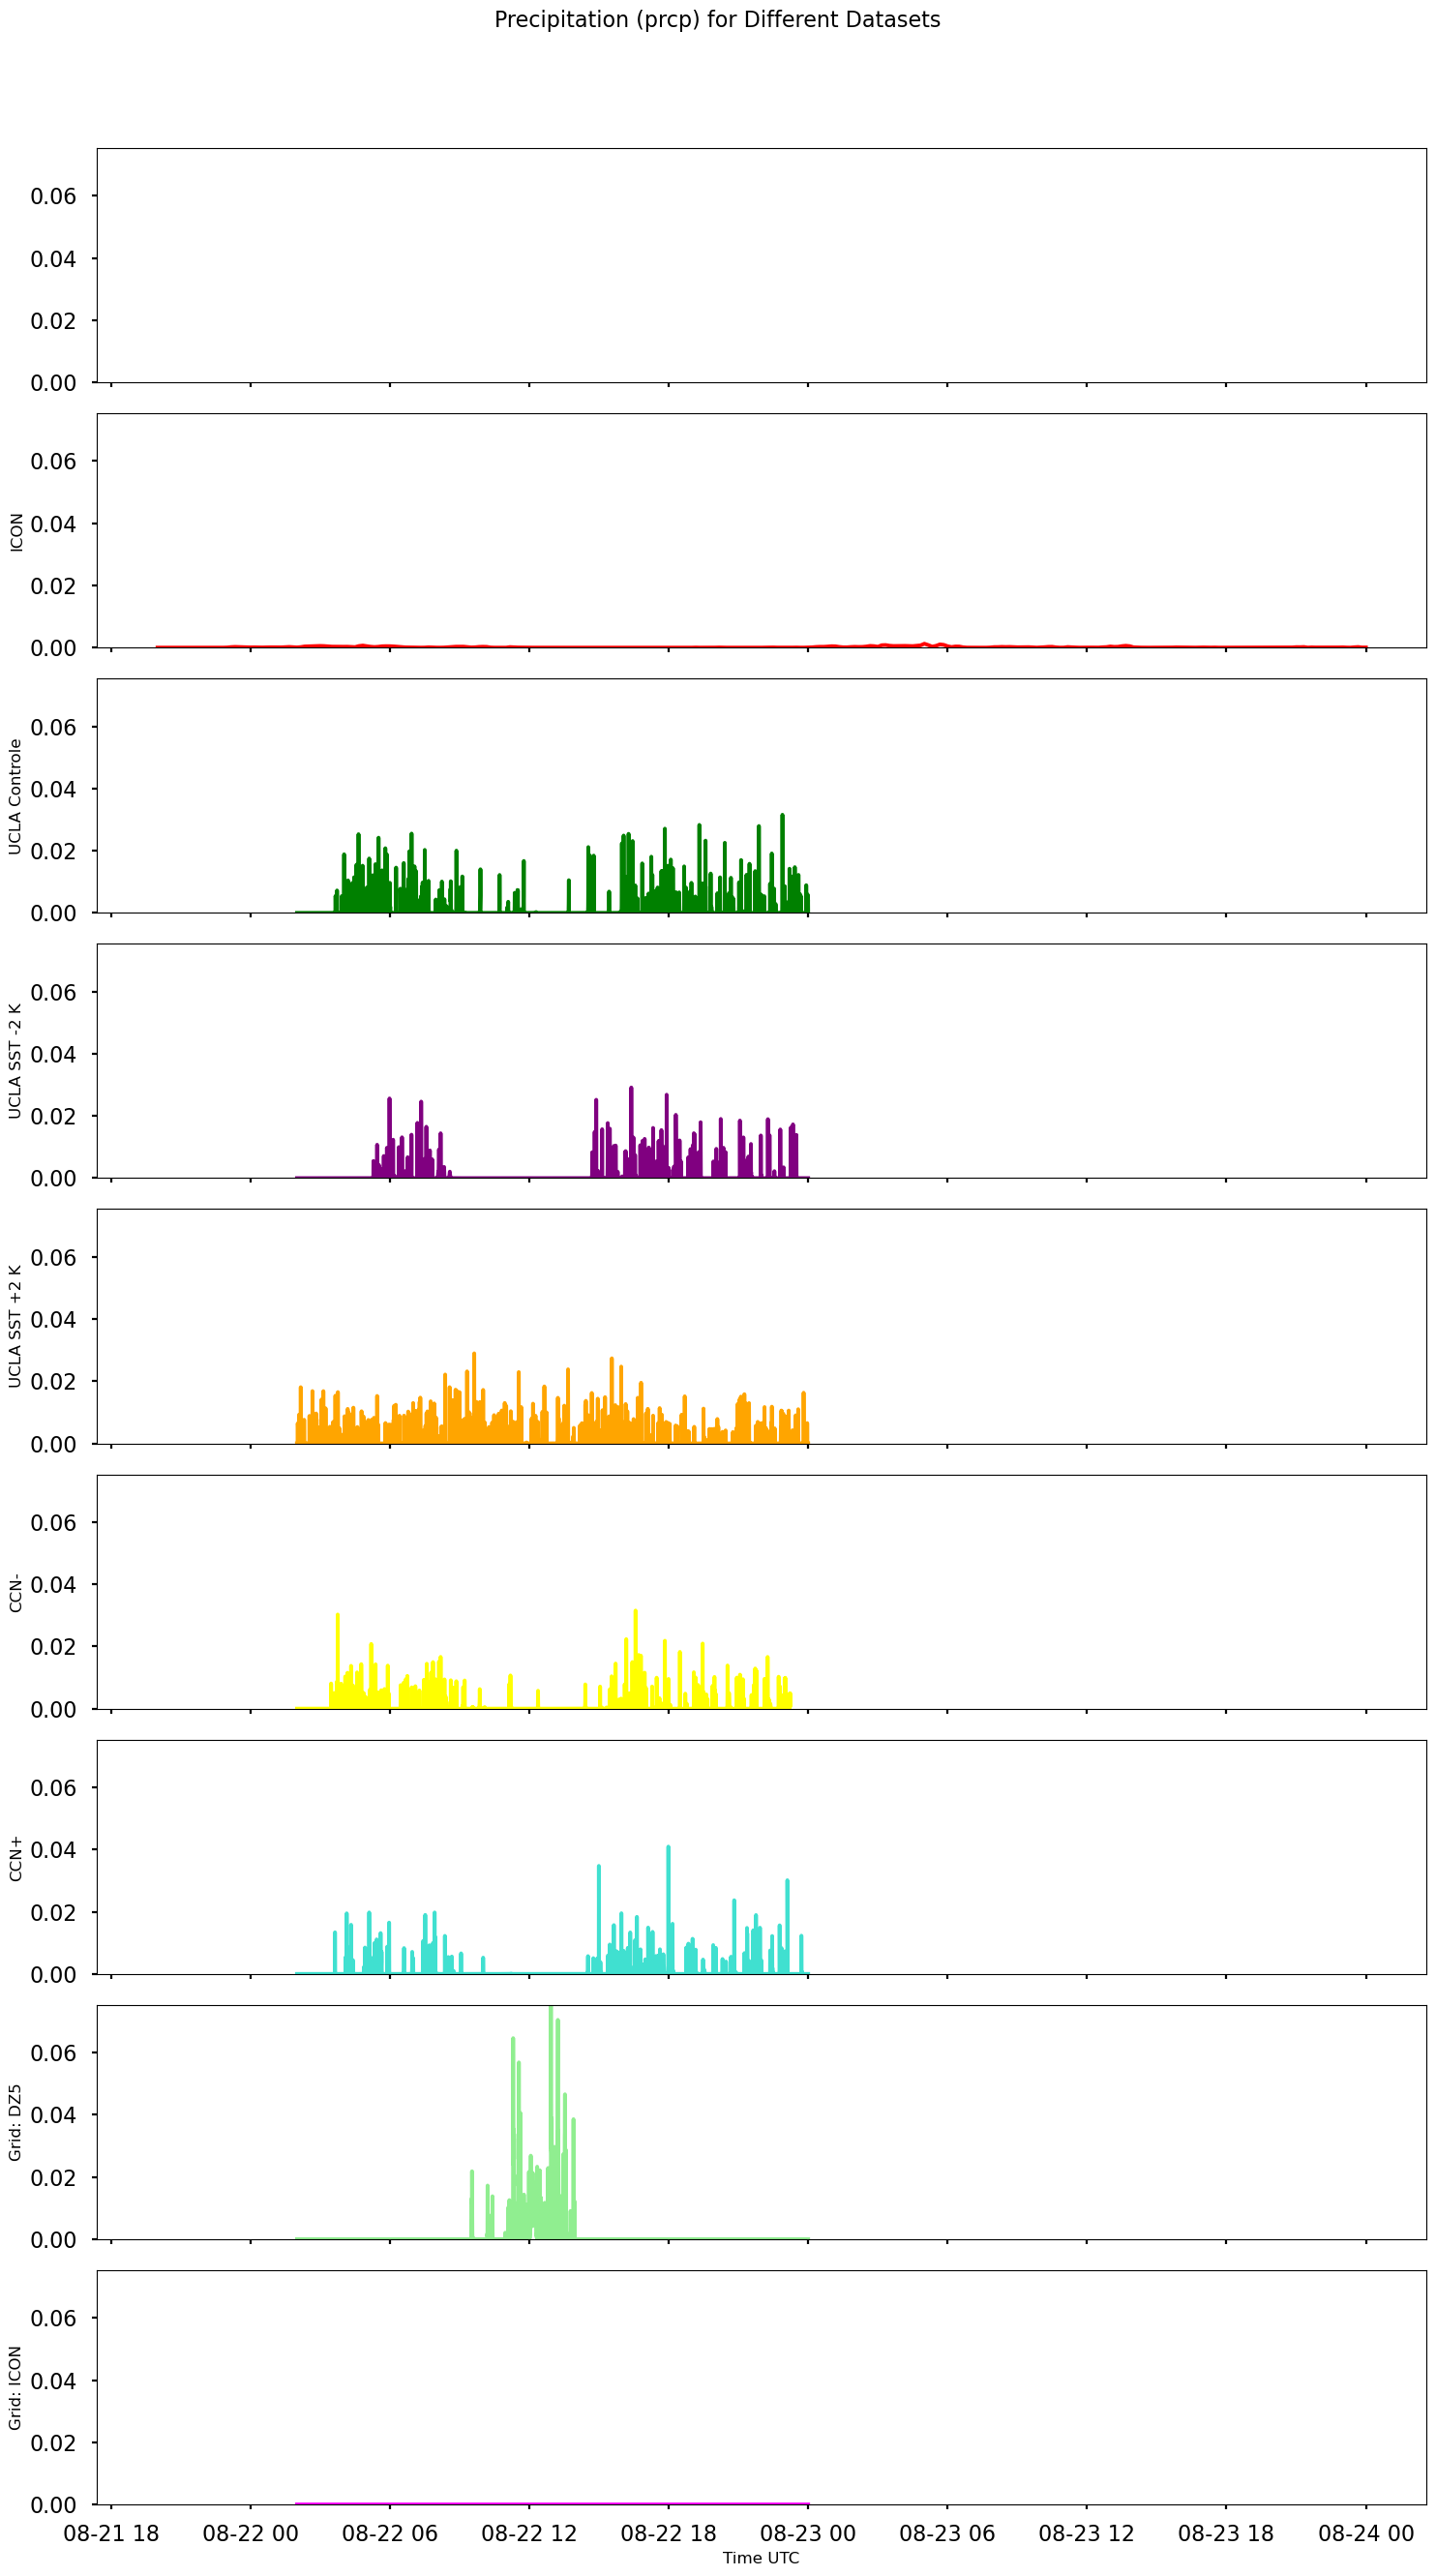

<xarray.DataArray 'prcp' (time: 5281)> Size: 21kB
array([4.920107e-11, 4.933517e-11, 4.947252e-11, ..., 3.214235e-03,
       4.265665e-03, 2.591823e-04], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 42kB 2000-01-01T02:00:00 ... 2000-01-02
Attributes:
    longname:  Surface precipitation rate
    units:     kg/kg m/s


In [20]:
# Niederschlag:

# Erstellen einer Figur mit mehreren Subplots
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(15, 28), sharex=True)

# Titel für die gesamte Figur
fig.suptitle("Precipitation (prcp) for Different Datasets", fontsize=16)

# Plot für jeden Datensatz in einem eigenen Subplot
# axes[0].plot(ds_foghat_prcp["time"], ds_foghat_prcp["prw"], color="blue")
# axes[0].set_ylabel("Foghat", fontsize=12)

# Durch die vertikale Integration, habe ich den Gesamtwassergehalt in kg/m**2
# für eine Regenrate in mm/h müsste, ich aber noch mit einer Fallgeschwindigkeit multiplizieren m/h => kg/m und h == mm/h 
icon_times_np2 = [convert_single_timestamp(value) for value in ds_icon["time"].values]
axes[1].plot(icon_times_np2, ds_icon["qr"].isel(ncells=0).sum("height"), color="red")
axes[1].set_ylabel("ICON", fontsize=12) # unit kg/kg specific rain content

# Add sunset and sunrise, lines:
# ax.axvline(np.datetime64("2018-08-22T11:58:00"), color="black",label="sunrise 7:58 LOC")
# ax.axvline(np.datetime64("2018-08-22T23:28:00"), color="black",label="sunset 19:28 LOC")

axes[2].plot(controle_time, controle_tsds["prcp"].values, color="green")
axes[2].set_ylabel("UCLA Controle", fontsize=12)
# unit: kg/kg m/s Was soll das sein?

axes[3].plot(controle_time, sst_minus_tsds["prcp"].values, color="purple")
axes[3].set_ylabel("UCLA SST -2 K", fontsize=12)

axes[4].plot(controle_time, sstplus_tsds["prcp"].values, color="orange")
axes[4].set_ylabel("UCLA SST +2 K", fontsize=12)

axes[5].plot(ccn_new_time, ccn_minus_tsds["prcp"].values, color="yellow")
axes[5].set_ylabel("CCN-", fontsize=12)

axes[6].plot(controle_time, ccn_plus_tsds["prcp"].values, color="turquoise")
axes[6].set_ylabel("CCN+", fontsize=12)

axes[7].plot(controle_time, grid5_00_tsds["prcp"].values, color="lightgreen")
axes[7].set_ylabel("Grid: DZ5", fontsize=12)

axes[8].plot(controle_time, grid_icon_00_tsds["prcp"].values, color="magenta")
axes[8].set_ylabel("Grid: ICON", fontsize=12)

# Gemeinsame x-Achsenbeschriftung
plt.xlabel("Time UTC", fontsize=12)

# Y-Achsenbeschriftung für alle Subplots
for ax in axes:
    ax.set_ylim(0, max(controle_tsds["prcp"].max(), sst_minus_tsds["prcp"].max(), 
                        sstplus_tsds["prcp"].max(), grid5_00_tsds["prcp"].max(),
                        grid_icon_00_tsds["prcp"].max()))
    ax.label_outer()  # Verstecke x-Achsenbeschriftungen für alle außer den unteren Plot

# Abstand zwischen den Subplots anpassen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Speichern des Plots als Bilddatei (optional)
# plt.savefig(outputdir+"precipitation_multipanel_plot.png")

# Plot anzeigen
plt.show()

################################################
# Plot precipitation from ICON
# Plot precipitation from obs!

print(controle_tsds["prcp"])

In [14]:
print(ds_foghat_cloud22.data_vars)

print(ds_class22["target_classification"]) 

print(grid5_00_tsds["prcp"])

print(ds_icon.data_vars)
print(ds_icon["qr"]) # unit kg/kg specific rain content

Data variables:
    lat                      float64 8B ...
    lon                      float64 8B ...
    zsl                      float64 8B ...
    time_bnds                (time, nv) datetime64[ns] 985kB ...
    azi                      (time) float32 246kB ...
    ele                      (time) float32 246kB ...
    ele_ret                  (n_ret) float32 4B ...
    clwvi                    (time) float32 246kB 0.09051 0.09516 ... 0.1665
    clwvi_off_zenith         (time) float32 246kB ...
    clwvi_err                (n_ret) float32 4B ...
    clwvi_offset_zeroing     (time) float32 246kB ...
    clwvi_offset             (time) float32 246kB ...
    clwvi_off_zenith_offset  (time) float32 246kB ...
    flag                     (time) float32 246kB ...
<xarray.DataArray 'target_classification' (time: 2868, height: 592)> Size: 2MB
[1697856 values with dtype=int8]
Coordinates:
  * time     (time) datetime64[ns] 23kB 2018-08-22T00:01:15.000002235 ... 201...
  * height   (height) 